# Project:  EDA of Auto MPG Data Set

We do exploratory data analysis on the the MPG data obtained from [UCI](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). The goal is to explore the relation of the MPG and other attibutes of the data. This is a project for Qishi Python class Homework 7.

First import libraries and download data. 

In [1]:
# Python library
import os
import sys
import operator
import random
import math
import re
import json

# database
import pandas as pd
import numpy as np
import glob


# plotting 
import seaborn as sns
color = sns.color_palette()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from myPlot import cate_plot, num_plot, pivot_plot, describe_target

# data wrangler
from scipy import sparse
from sklearn import model_selection, preprocessing, ensemble
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# pipeline
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# parameter tuning
from bayes_opt import BayesianOptimization

# display
from IPython.display import Image, display, HTML, Audio


# classification
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNR

# metrics
from sklearn.metrics import classification_report, accuracy_score, log_loss

#from mpl_toolkits.basemap import Basemap
#from matplotlib import cm
SEED=3

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
df=pd.read_csv('auto-mpg.data.txt', sep="\s+", header=None)

In [3]:
df.head(3)

0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.isnull().sum(axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## Clean the data

Change column names

In [6]:
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'model']

In [7]:
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                      model  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [8]:
df.loc[32]

mpg                     25
cylinders                4
displacement            98
horsepower               ?
weight                2046
acceleration            19
model_year              71
origin                   1
model           ford pinto
Name: 32, dtype: object

In [9]:
type(df.loc[32, 'horsepower'])

str

So we need to convert horsepower to numerical, and fill in the missing data. 

In [10]:
df['horsepower']=df['horsepower'].convert_objects(convert_numeric=True)

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
model           398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [12]:
df['horsepower'].isnull().any()

True

In [13]:
df[df['horsepower'].isnull()]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   
374  23.0          4         151.0         NaN  3035.0          20.5   

     model_year  origin                 model  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl

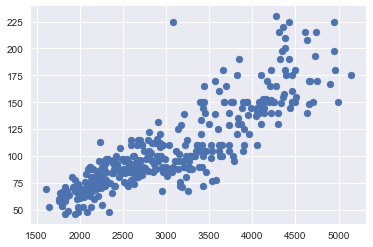

In [14]:
plt.scatter(x=df['weight'], y=df['horsepower'])

It verifies that there is a strong linear correlation between horsepower and weight. We can use linear regression to fill in the missing data for horsepower.

In [15]:
lr = LR()

In [16]:
weight=df.loc[~df['horsepower'].isnull(), 'weight'].values.reshape(-1,1)
weight.shape

(392, 1)

In [17]:
hp=df.loc[~df['horsepower'].isnull(), 'horsepower'].values.reshape(-1,1)
hp.shape

(392, 1)

In [18]:
lr.fit(weight, hp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
v=lr.predict(df.loc[df['horsepower'].isnull(), 'weight'].reshape(-1,1)).flatten()

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [20]:
v

array([  67.97269639,  100.45044523,   59.70634536,  101.6257558 ,
         78.70719963,  106.71876829])

In [21]:
lst=[32, 126, 330, 336, 354, 374]

In [22]:
for i, j in zip(lst, v):
    df.loc[i, 'horsepower']=j

In [23]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
model           False
dtype: bool

## Explore the data

We first look at the distribution of each attribute and their relation to MPG.

In [24]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.188898  2970.424623   
std      7.815984    1.701004    104.269838   38.330757   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

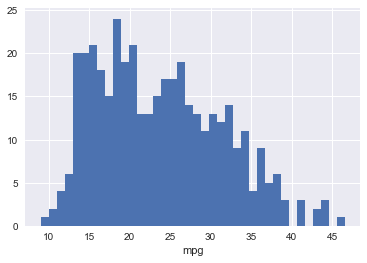

In [25]:
plt.hist(x=df['mpg'], bins=38)
plt.xlabel('mpg')
plt.show()

Most of the MPG are between 14 and 35. We know the 25% is at 17.5 and 75% is at 29. The data is skewed towards low MPG. In other words, it has relatively long tail towards high MPG.

In [26]:
df['origin'].unique()

array([1, 3, 2])

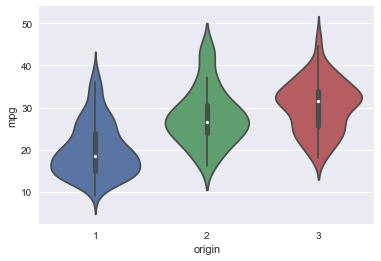

In [27]:
sns.violinplot(x='origin', y='mpg', data=df)
plt.xlabel('origin')
plt.ylabel('mpg')
plt.show()

It not clear what the origin means. Maybe it refers to the manufactoring place. 3 is the highest, maybe Japan, 1 is the lowest, maybe the US.

In [28]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

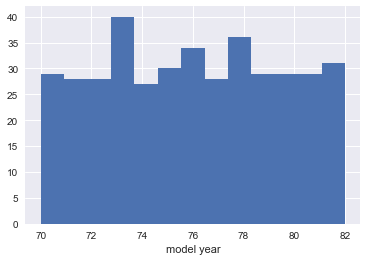

In [29]:
plt.hist(df['model_year'], bins=13)
plt.xlabel('model year')
plt.show()

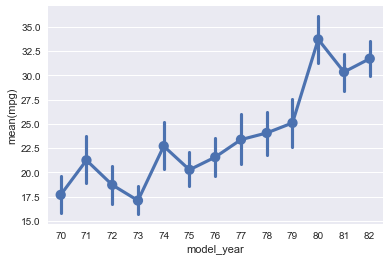

In [30]:
sns.pointplot(x='model_year', y='mpg', data=df)

It is no surprise that more recent cars have better MPG.

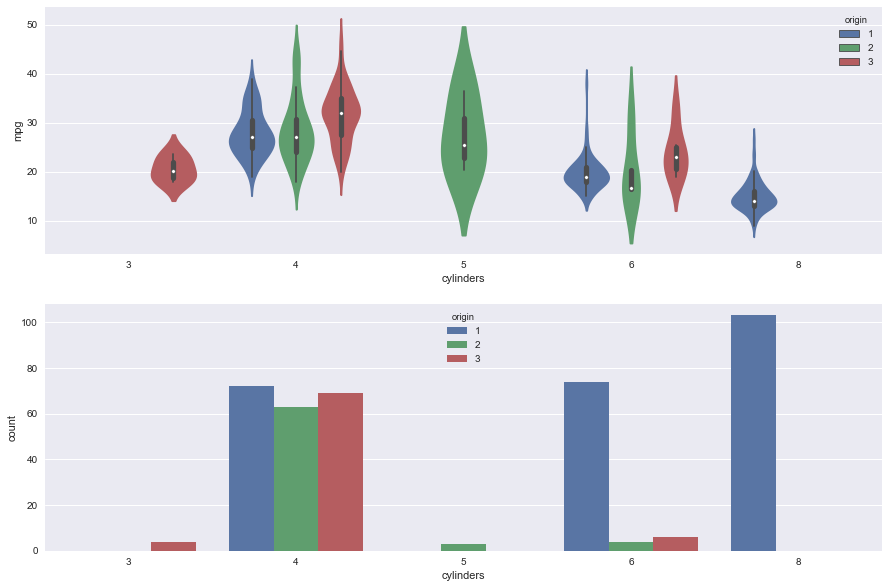

In [31]:
fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(15,10))
sns.violinplot(x='cylinders', y='mpg', hue='origin', data=df, ax=ax1)
sns.countplot(x='cylinders', data=df, hue='origin', ax=ax2)
plt.show()

Usually more cylinders mean lower MPG, but here is an exception. For cylinder=3, it is from origin 3 and has the very low MPG. We need to further study cylinder=3 

In [32]:
df[df['cylinders']==3]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
71   19.0          3          70.0        97.0  2330.0          13.5   
111  18.0          3          70.0        90.0  2124.0          13.5   
243  21.5          3          80.0       110.0  2720.0          13.5   
334  23.7          3          70.0       100.0  2420.0          12.5   

     model_year  origin            model  
71           72       3  mazda rx2 coupe  
111          73       3        maxda rx3  
243          77       3       mazda rx-4  
334          80       3    mazda rx-7 gs

It is Mazda RX series, using a special rotary engine called Wankel. It is obvious these cars should be treated separately. 

In [33]:
df['is_rotary']=0
df.loc[df['cylinders']==3, 'is_rotary']=1

In [34]:
df.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   

   model_year  origin                      model  is_rotary  
0          70       1  chevrolet chevelle malibu          0  
1          70       1          buick skylark 320          0  
2          70       1         plymouth satellite          0

In [35]:
df.describe(include=['O'])

model
count          398
unique         305
top     ford pinto
freq             6

In [36]:
models=df['model'].value_counts().sort_values(ascending=False)
models.head(5)

ford pinto        6
ford maverick     5
toyota corolla    5
amc matador       5
amc gremlin       4
Name: model, dtype: int64

In [37]:
df['brand']=df['model'].str.split().str.get(0)
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                      model  is_rotary      brand  
0          70       1  chevrolet chevelle malibu          0  chevrolet  
1          70       1          buick skylark 320          0      buick  
2          70       1         plymouth satellite          0   plymouth  
3          70       1              amc rebel sst          0        amc  
4          70       1                ford torino          0       ford

In [38]:
lst= df['brand'].unique()
lst.sort()
print lst

['amc' 'audi' 'bmw' 'buick' 'cadillac' 'capri' 'chevroelt' 'chevrolet'
 'chevy' 'chrysler' 'datsun' 'dodge' 'fiat' 'ford' 'hi' 'honda' 'maxda'
 'mazda' 'mercedes' 'mercedes-benz' 'mercury' 'nissan' 'oldsmobile' 'opel'
 'peugeot' 'plymouth' 'pontiac' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'triumph' 'vokswagen' 'volkswagen' 'volvo' 'vw']


There might be typos. For example, 'toyouta' may be 'toyota'. 'volkswagen', 'vw', 'vokswagen'.
'maxda' may be 'mazda', 'chevroelt', 'chevy' are 'chevrolet'.

In [39]:
df[df['brand']=='hi']

mpg  cylinders  displacement  horsepower  weight  acceleration  \
28  9.0          8         304.0       193.0  4732.0          18.5   

    model_year  origin     model  is_rotary brand  
28          70       1  hi 1200d          0    hi

In [40]:
df.loc[df['brand']=='chevroelt', 'brand']='chevrolet'
df.loc[df['brand']=='chevy', 'brand']='chevrolet'
df.loc[df['brand']=='maxda', 'brand']='mazda'
df.loc[df['brand']=='mercedes-benz', 'brand']='mercedes'
df.loc[df['brand']=='toyouta', 'brand']='toyota'
df.loc[df['brand']=='vokswagen', 'brand']='volkswagen'
df.loc[df['brand']=='vw', 'brand']='volkswagen'

In [41]:
lst= df['brand'].unique()
lst.sort()
print lst

['amc' 'audi' 'bmw' 'buick' 'cadillac' 'capri' 'chevrolet' 'chrysler'
 'datsun' 'dodge' 'fiat' 'ford' 'hi' 'honda' 'mazda' 'mercedes' 'mercury'
 'nissan' 'oldsmobile' 'opel' 'peugeot' 'plymouth' 'pontiac' 'renault'
 'saab' 'subaru' 'toyota' 'triumph' 'volkswagen' 'volvo']


Because there are thirty brands, we divide it into three plots.

[]

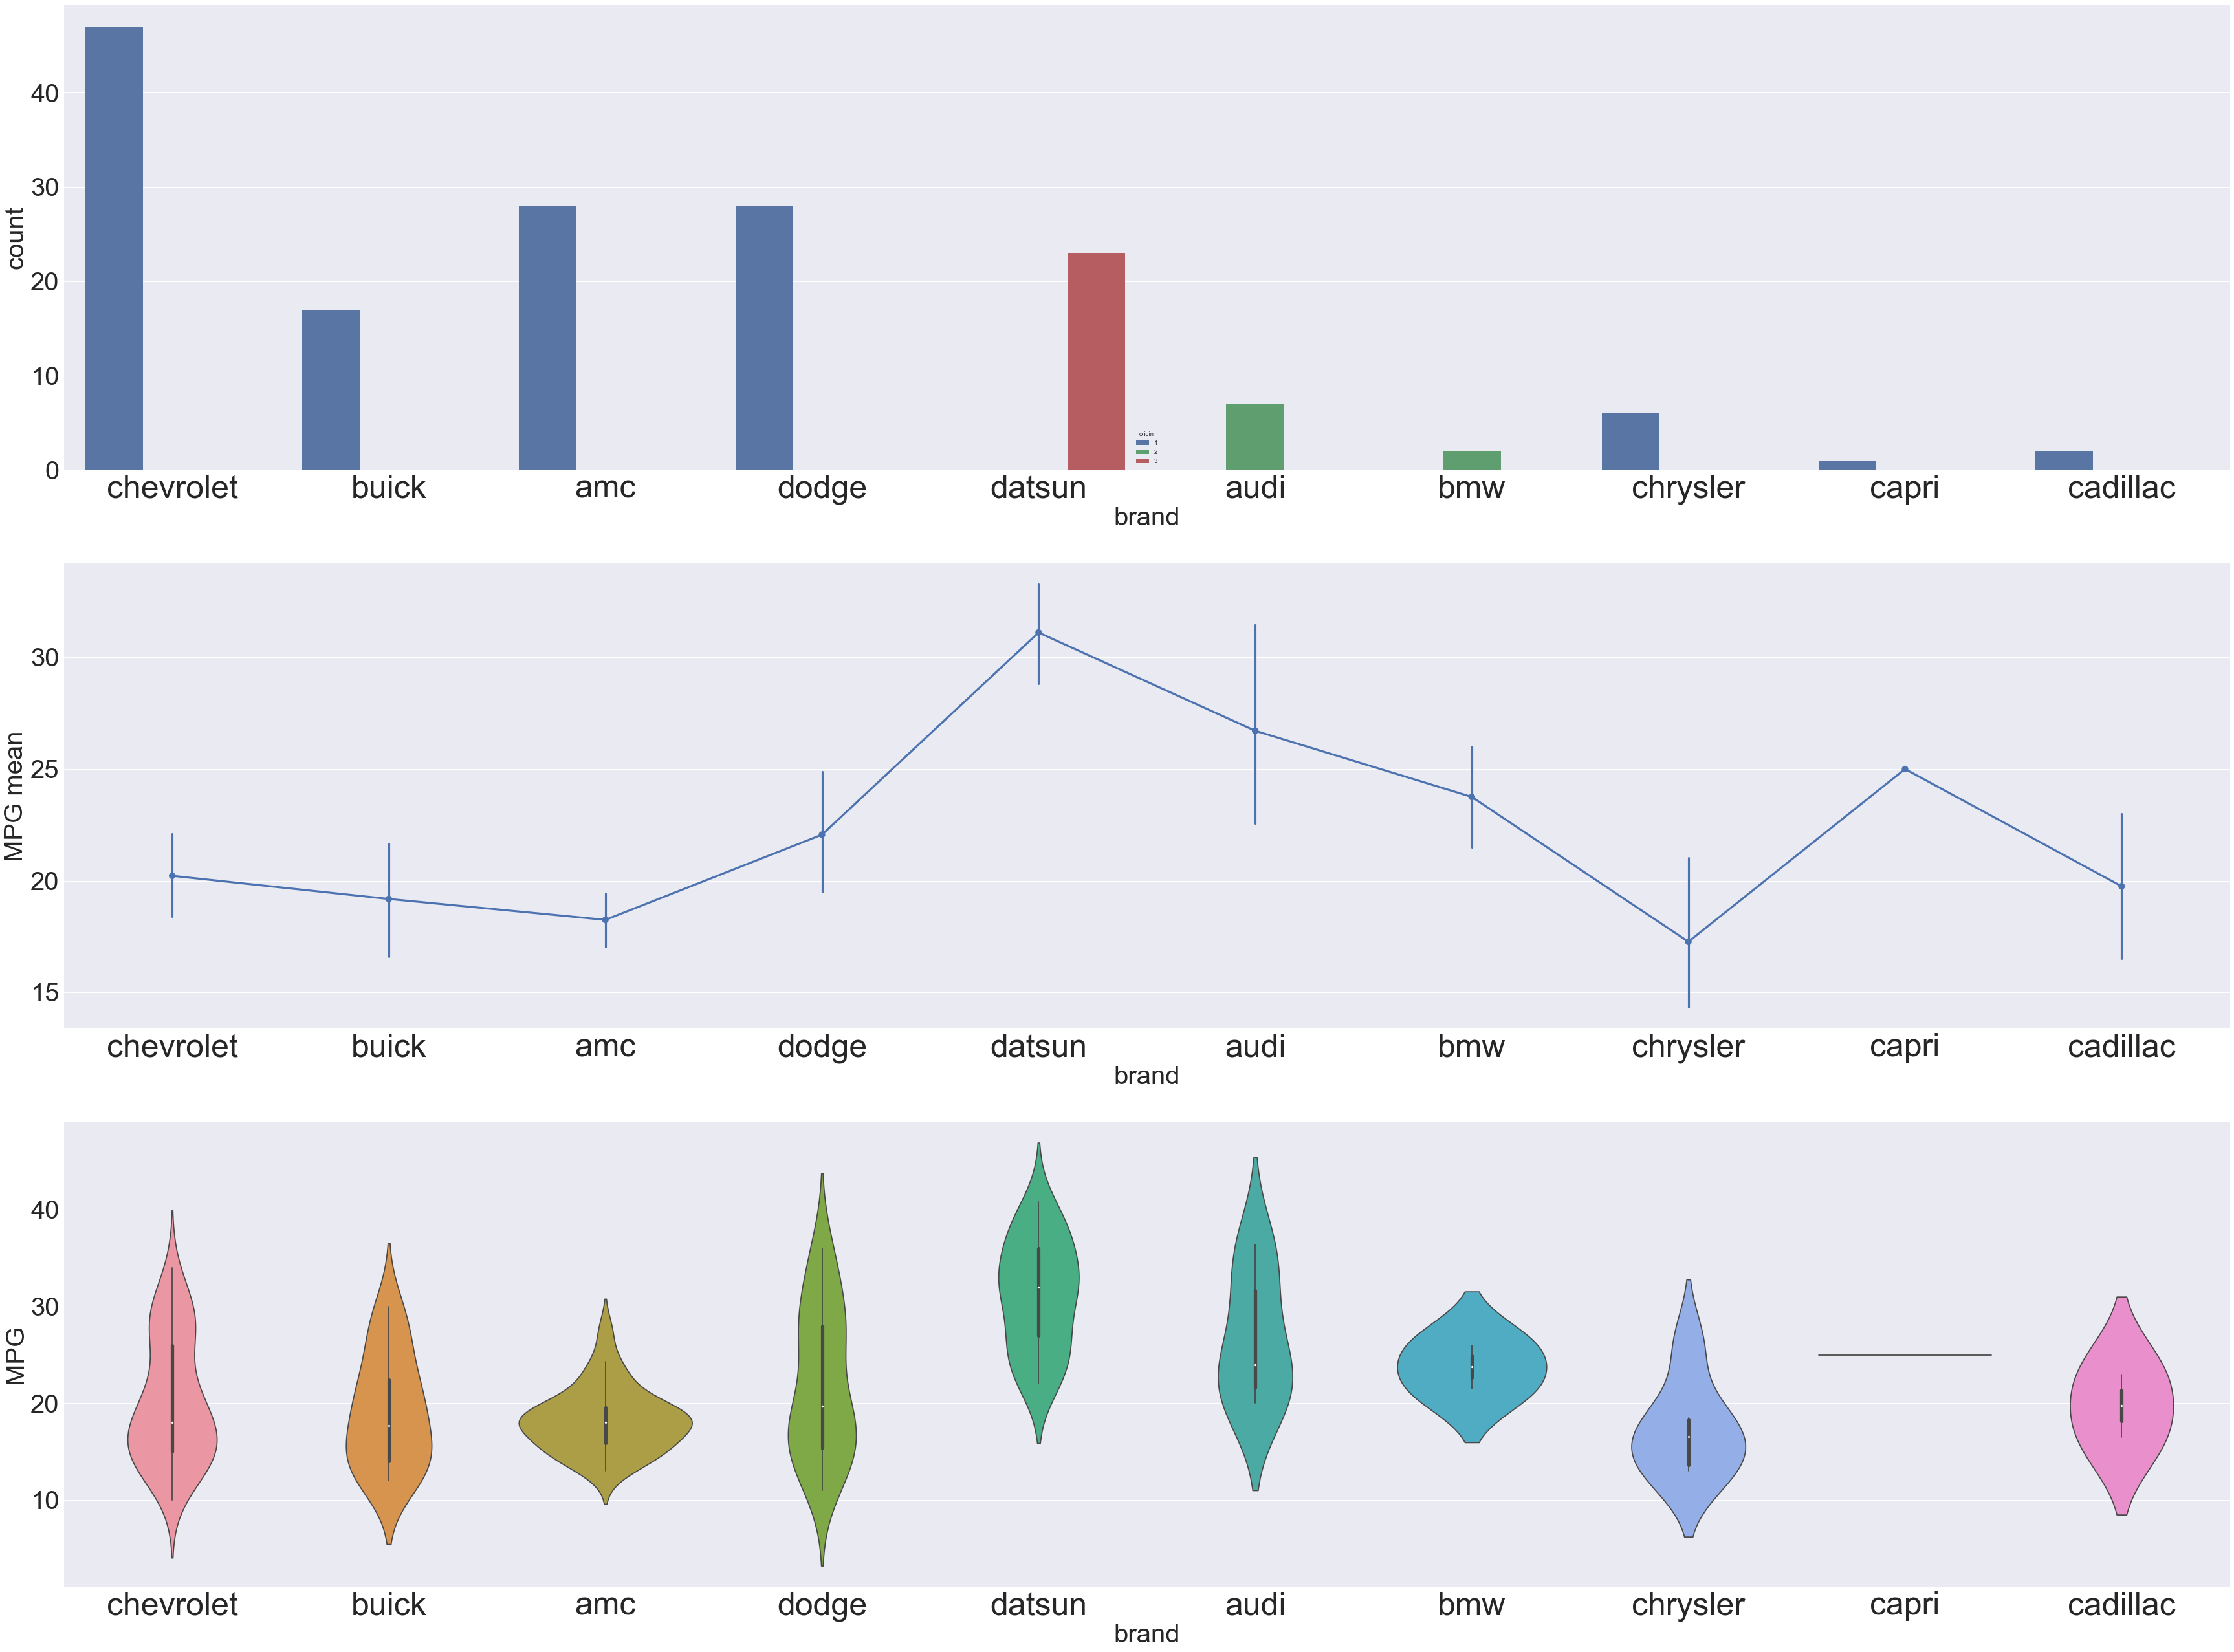

In [42]:
fig, (ax1, ax2, ax3)=plt.subplots(3, 1, figsize=(60, 45)) 
for item in [ax1, ax2, ax3]:
    item.tick_params(axis='x', labelsize=50)
    item.tick_params(axis='y', labelsize=40)
    item.set_xlabel('brands', fontdict={'fontsize': 40})
    

sns.countplot(x='brand', data=df[df['brand'].isin(lst[:10])], hue='origin', ax=ax1)
ax1.set_ylabel('count', fontdict={'fontsize':40})
sns.pointplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[:10])], ax=ax2)
ax2.set_ylabel('MPG mean', fontdict={'fontsize':40})
sns.violinplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[:10])], ax=ax3)
ax3.set_ylabel('MPG', fontdict={'fontsize':40})
plt.plot()

[]

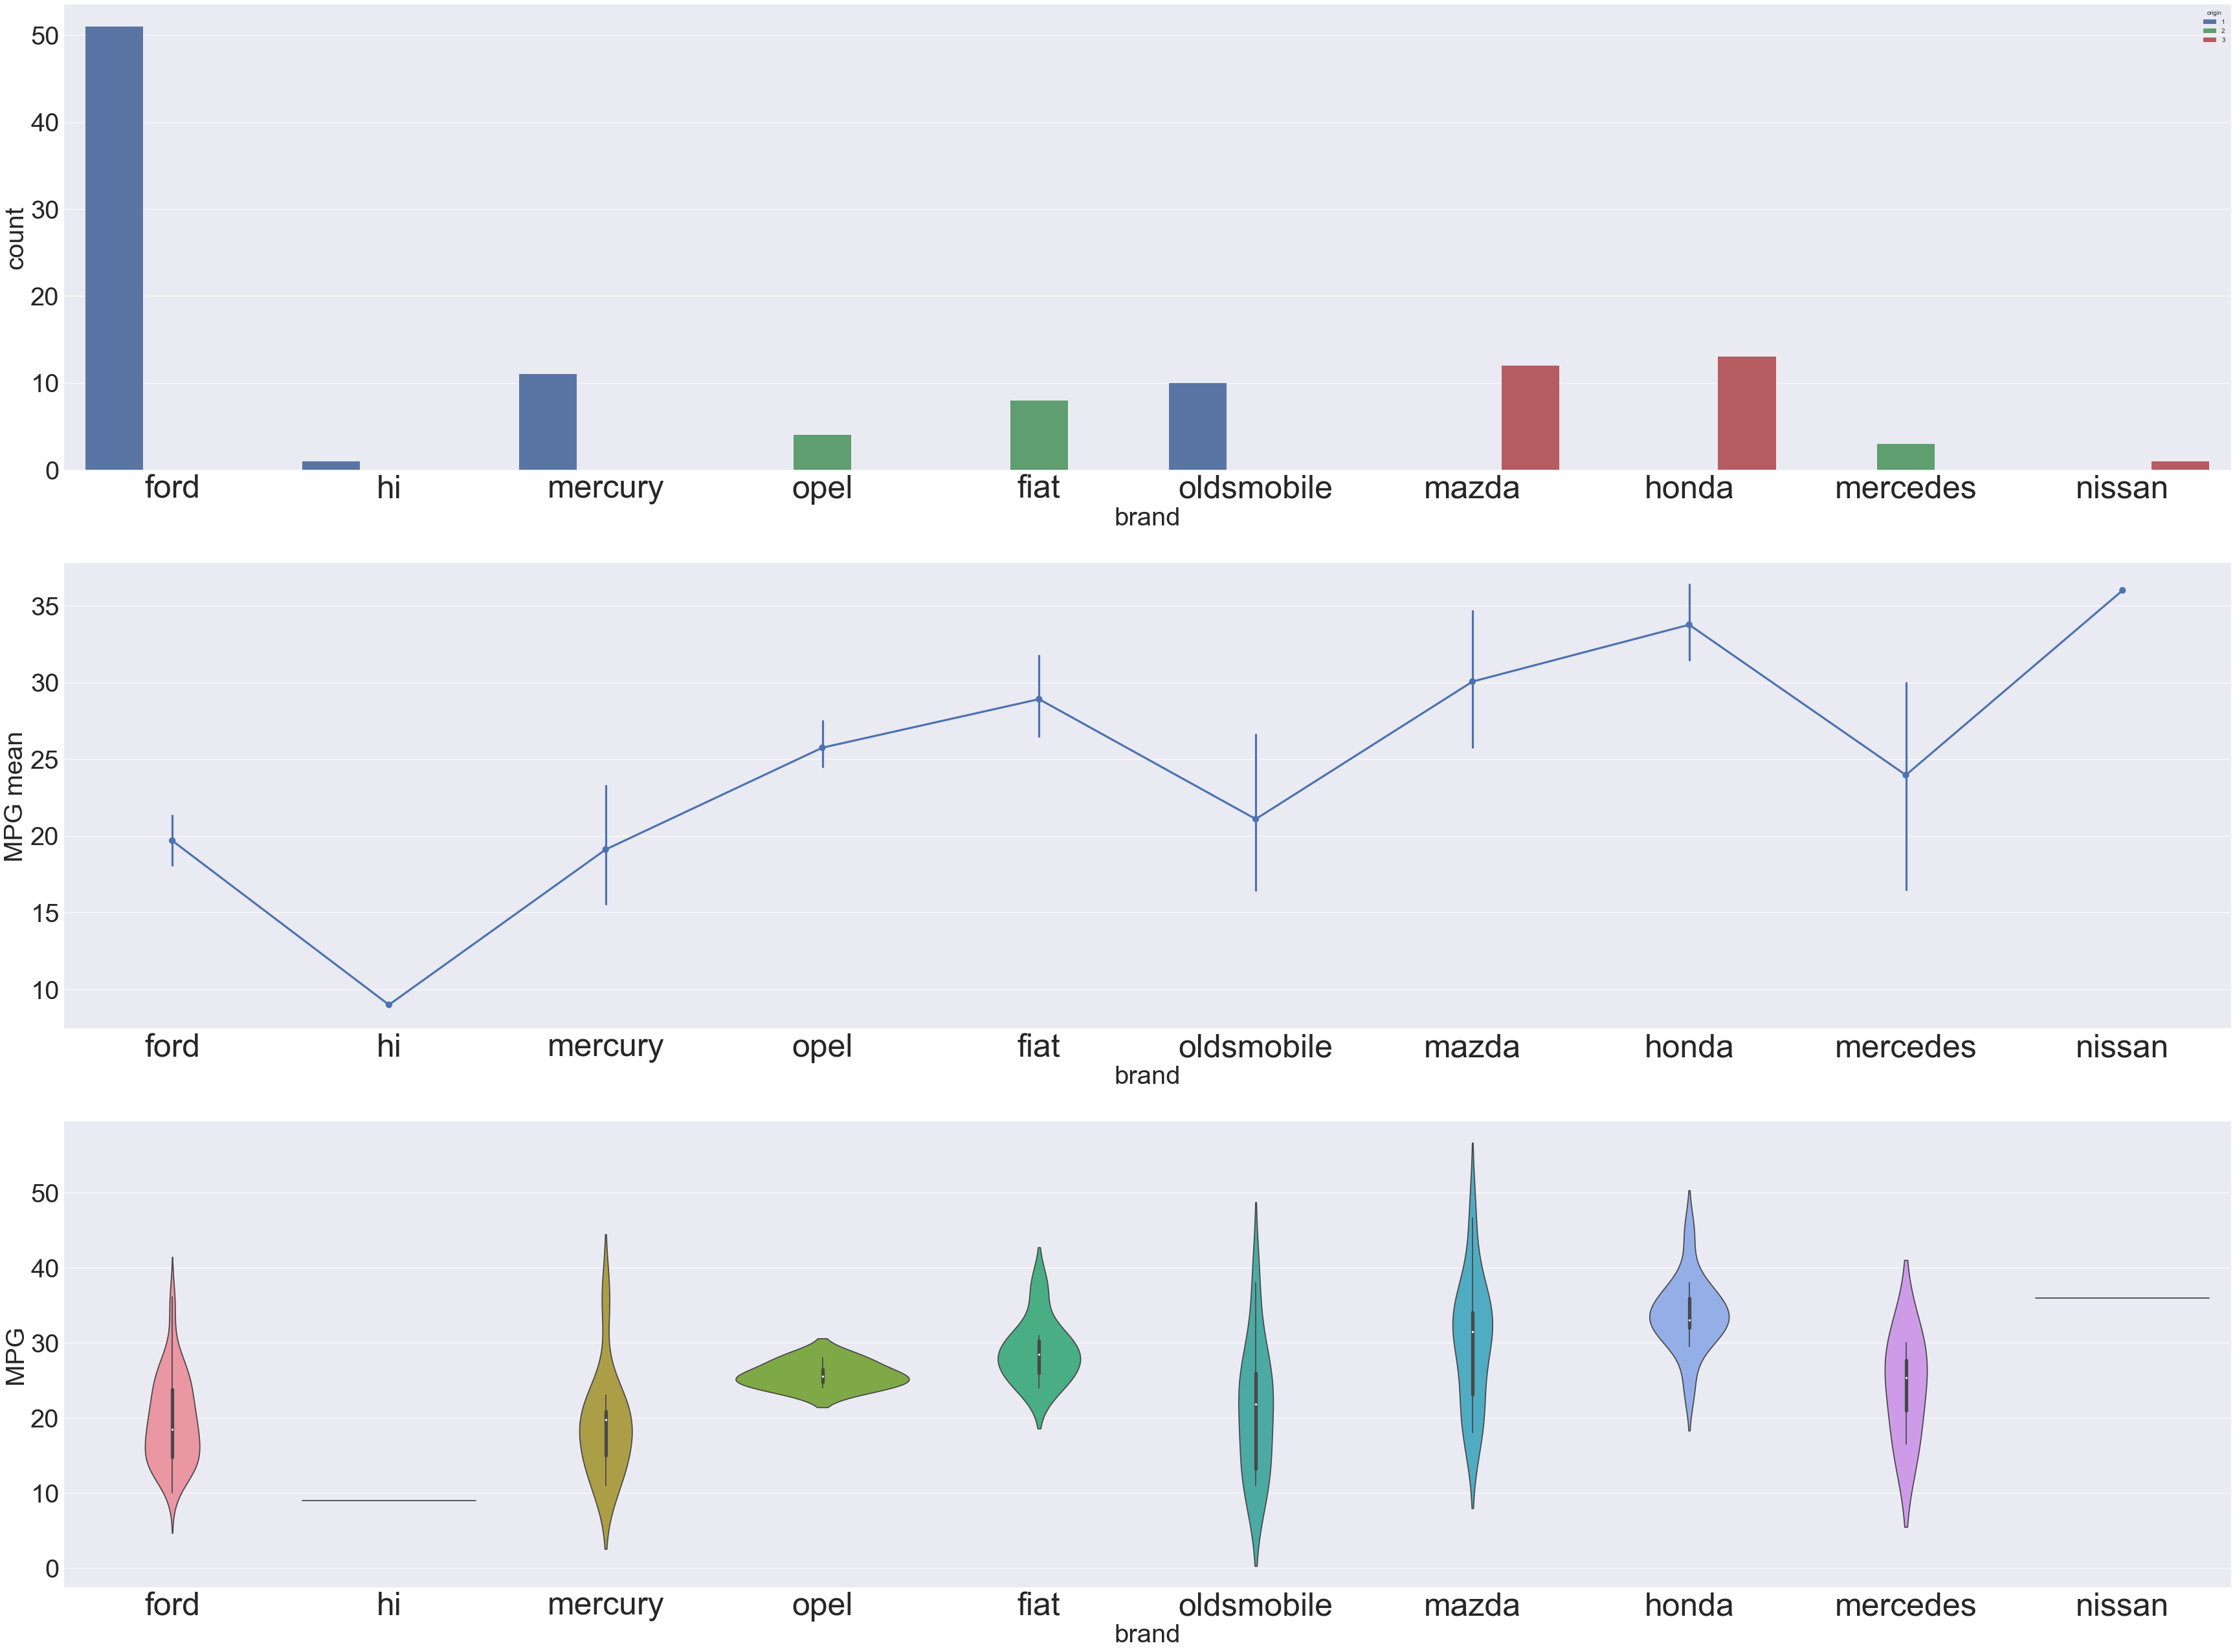

In [43]:
fig, (ax1, ax2, ax3)=plt.subplots(3, 1, figsize=(60, 45)) 
for item in [ax1, ax2, ax3]:
    item.tick_params(axis='x', labelsize=50)
    item.tick_params(axis='y', labelsize=40)
    item.set_xlabel('brands', fontdict={'fontsize': 40})
    

sns.countplot(x='brand', data=df[df['brand'].isin(lst[10:20])], hue='origin', ax=ax1)
ax1.set_ylabel('count', fontdict={'fontsize':40})
sns.pointplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[10:20])], ax=ax2)
ax2.set_ylabel('MPG mean', fontdict={'fontsize':40})
sns.violinplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[10:20])], ax=ax3)
ax3.set_ylabel('MPG', fontdict={'fontsize':40})
plt.plot()

[]

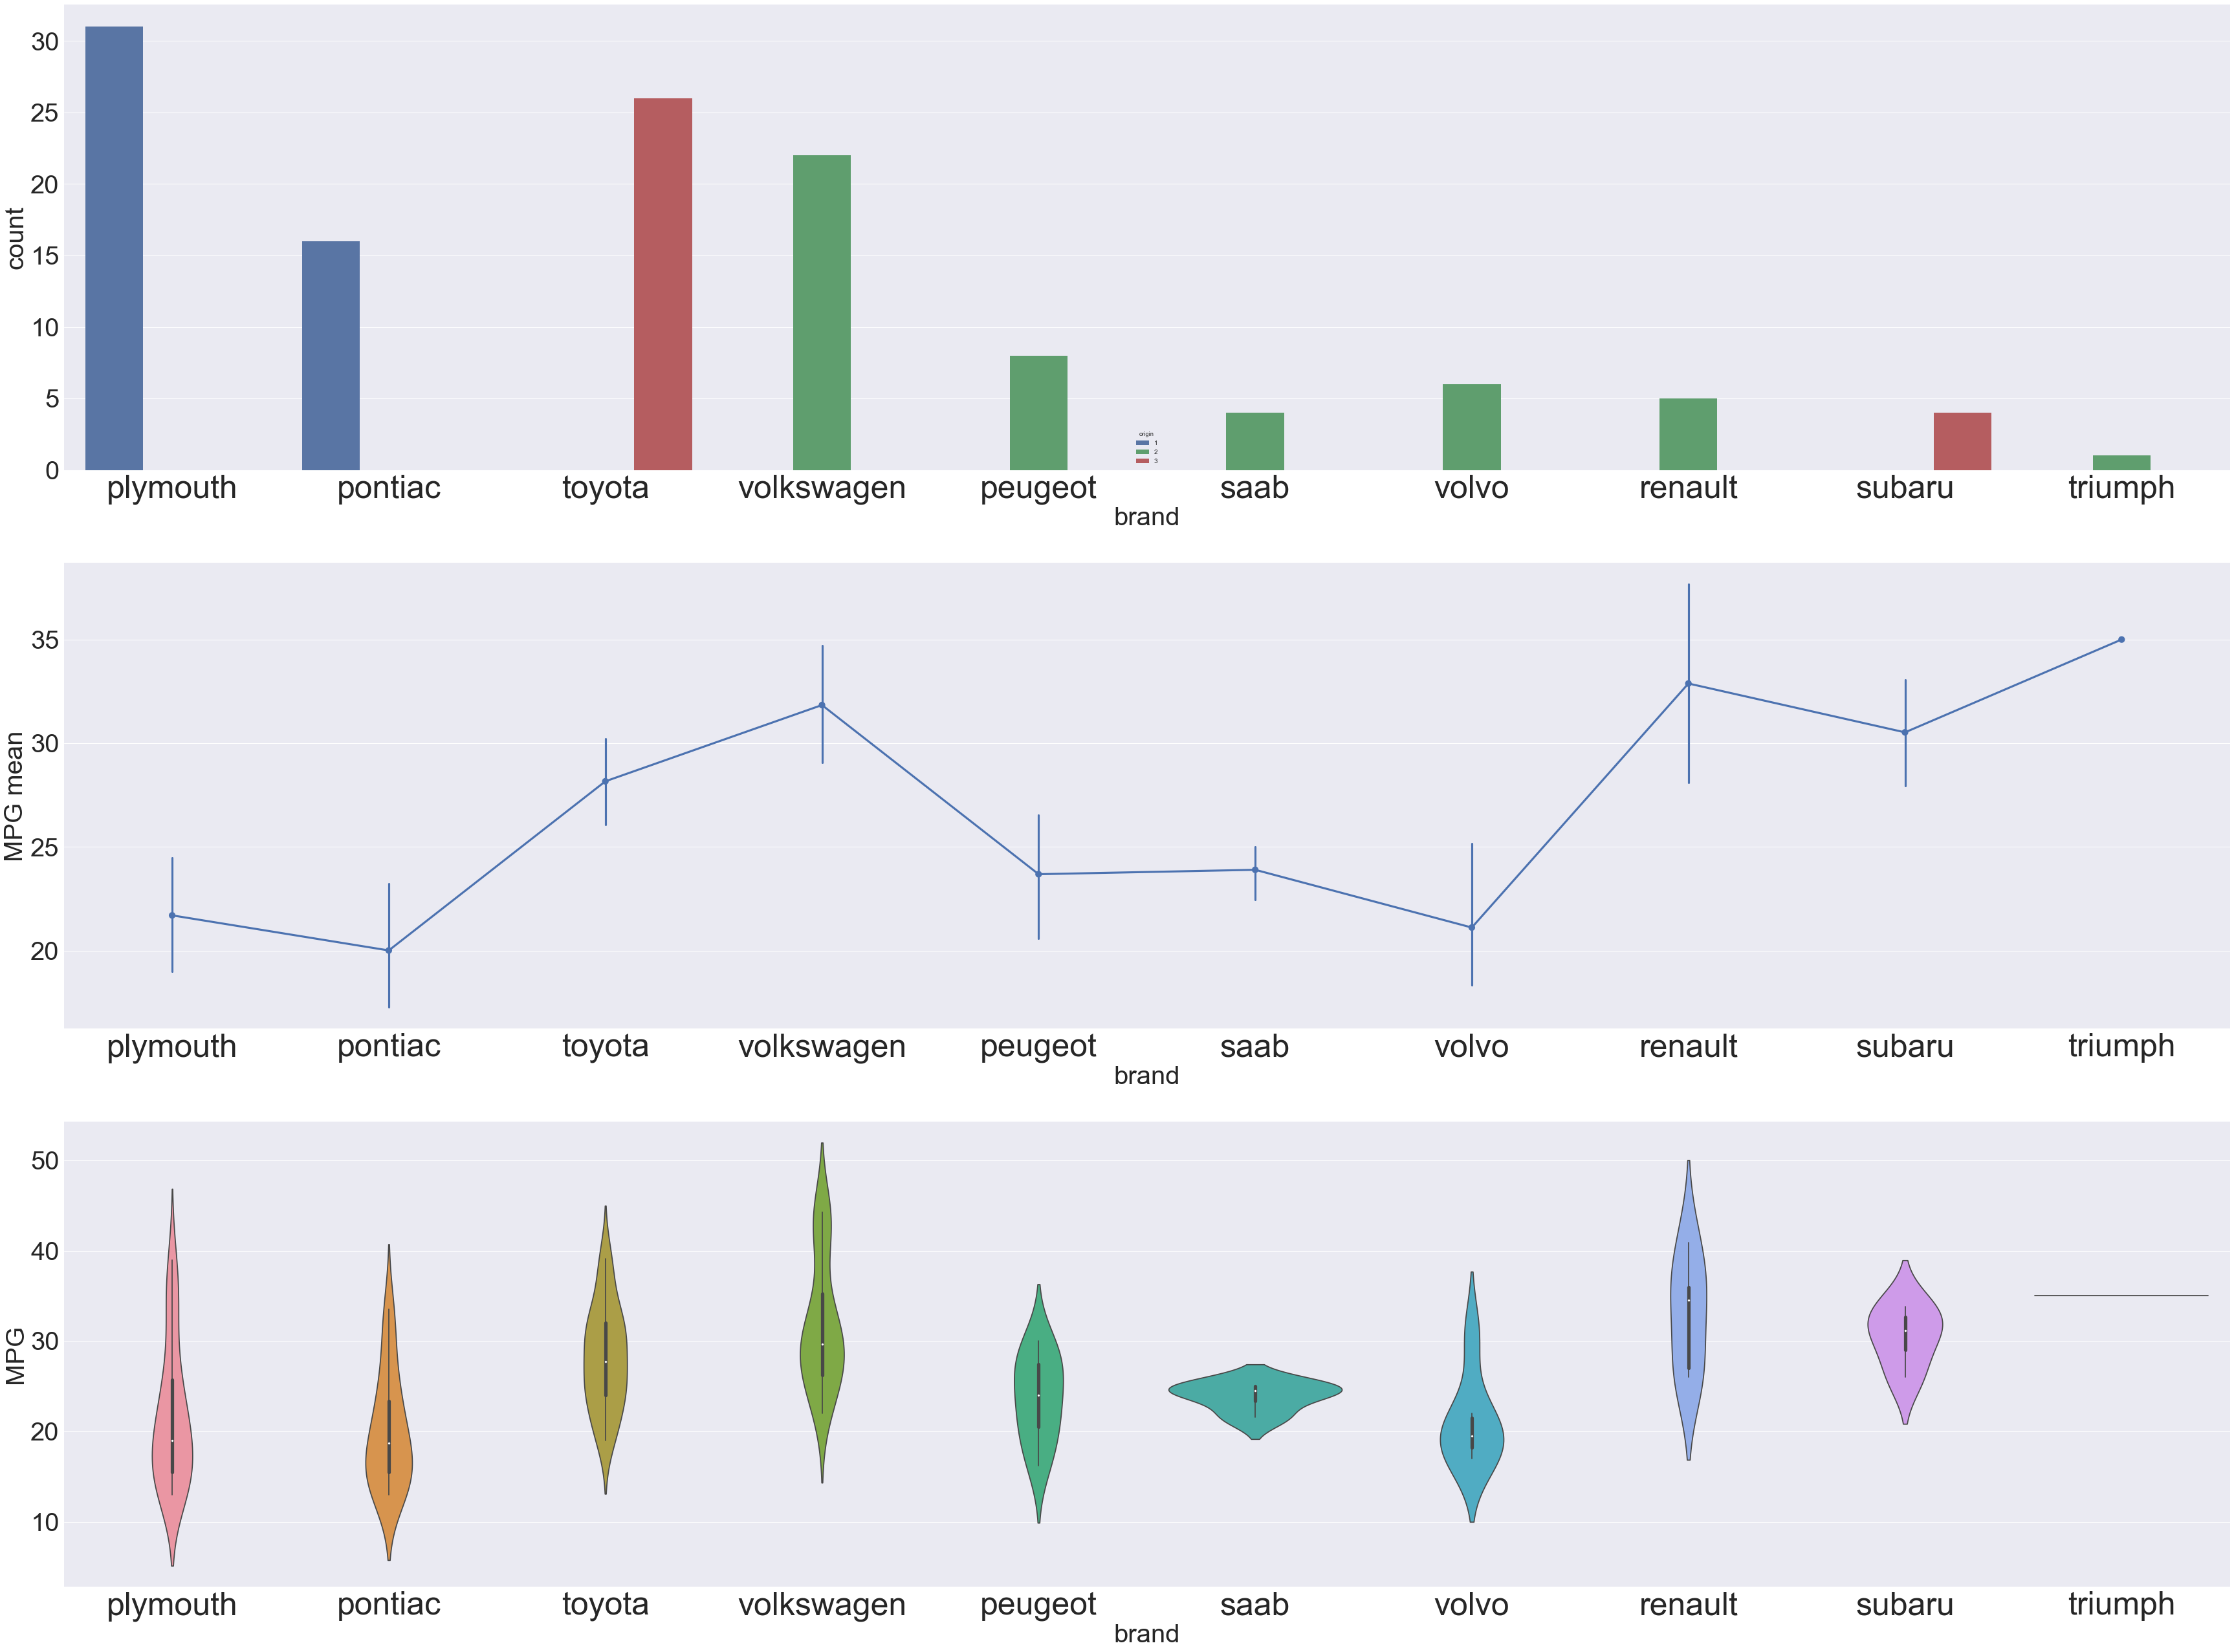

In [44]:
fig, (ax1, ax2, ax3)=plt.subplots(3, 1, figsize=(60, 45)) 
for item in [ax1, ax2, ax3]:
    item.tick_params(axis='x', labelsize=50)
    item.tick_params(axis='y', labelsize=40)
    item.set_xlabel('brands', fontdict={'fontsize': 40})
    

sns.countplot(x='brand', data=df[df['brand'].isin(lst[20:30])], hue='origin', ax=ax1)
ax1.set_ylabel('count', fontdict={'fontsize':40})
sns.pointplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[20:30])], ax=ax2)
ax2.set_ylabel('MPG mean', fontdict={'fontsize':40})
sns.violinplot(x='brand', y='mpg', data=df[df['brand'].isin(lst[20:30])], ax=ax3)
ax3.set_ylabel('MPG', fontdict={'fontsize':40})
plt.plot()

Opel and Saab have very consistent control of the MPG. It may be because they specialize in special submarket. 

In [45]:
brand_mpg=df[['mpg', 'brand']].groupby('brand', as_index=False).mean().sort_values(by='mpg', ascending=False)

The best MPG brands are

In [46]:
brand_mpg.head()

brand        mpg
17      nissan  36.000000
27     triumph  35.000000
13       honda  33.761538
23     renault  32.880000
28  volkswagen  31.840909

The worst MPG brands are... All American league...

In [47]:
brand_mpg.tail()

brand        mpg
3      buick  19.182353
16   mercury  19.118182
0        amc  18.246429
7   chrysler  17.266667
12        hi   9.000000

In [48]:
gp=df[['origin', 'brand']].groupby(['origin', 'brand'])
sorted(gp.groups.keys(), key=lambda x: x[0])

[(1, 'chrysler'),
 (1, 'plymouth'),
 (1, 'hi'),
 (1, 'cadillac'),
 (1, 'oldsmobile'),
 (1, 'dodge'),
 (1, 'chevrolet'),
 (1, 'mercury'),
 (1, 'buick'),
 (1, 'ford'),
 (1, 'capri'),
 (1, 'amc'),
 (1, 'pontiac'),
 (2, 'fiat'),
 (2, 'volvo'),
 (2, 'peugeot'),
 (2, 'bmw'),
 (2, 'opel'),
 (2, 'volkswagen'),
 (2, 'audi'),
 (2, 'triumph'),
 (2, 'saab'),
 (2, 'renault'),
 (2, 'mercedes'),
 (3, 'datsun'),
 (3, 'nissan'),
 (3, 'honda'),
 (3, 'subaru'),
 (3, 'mazda'),
 (3, 'toyota')]

Indeed, 1 is US, 2 is Europe, 3 is Japan

In [49]:
df['orgin']=df['origin'].map({1:'US', 2:'EU', 3:'Japan'})
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                      model  is_rotary      brand orgin  
0          70       1  chevrolet chevelle malibu          0  chevrolet    US  
1          70       1          buick skylark 320          0      buick    US  
2          70       1         plymouth satellite          0   plymouth    US  
3          70       1              amc rebel sst          0        amc    US  
4          70       1                ford torino          0       ford    US

In [50]:
df1=df[(df['cylinders']==4) & (df['model_year']==80)]
df1.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
309  41.5          4          98.0        76.0  2144.0          14.7   
310  38.1          4          89.0        60.0  1968.0          18.8   
311  32.1          4          98.0        70.0  2120.0          15.5   

     model_year  origin                  model  is_rotary       brand  orgin  
309          80       2              vw rabbit          0  volkswagen     EU  
310          80       3  toyota corolla tercel          0      toyota  Japan  
311          80       1     chevrolet chevette          0   chevrolet     US

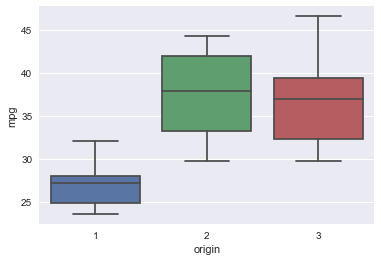

In [51]:
sns.boxplot(x='origin', y='mpg', data=df1)

The US still has the worst MPG.

It is natural that MPG should be related negatively with displacement and horsepower

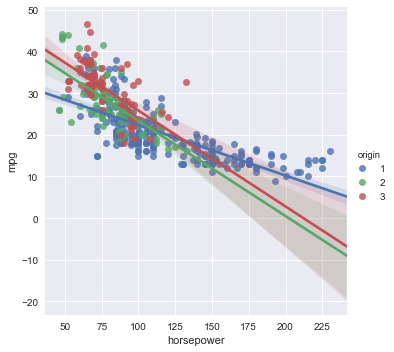

In [52]:
plt.figure(figsize=(20, 20))
sns.lmplot(x='horsepower', y='mpg', hue='origin', data=df)
plt.show()

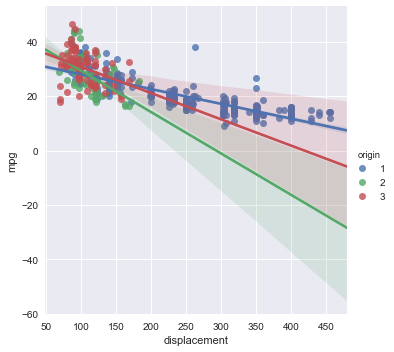

In [53]:
plt.figure(figsize=(20, 20))
sns.lmplot(x='displacement', y='mpg', hue='origin', data=df)
plt.show()

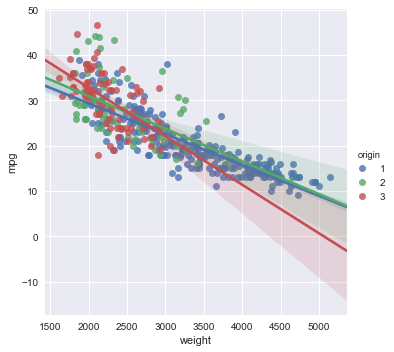

In [54]:
plt.figure(figsize=(20,20))
sns.lmplot(x='weight', y='mpg', hue='origin', data=df)
plt.show()

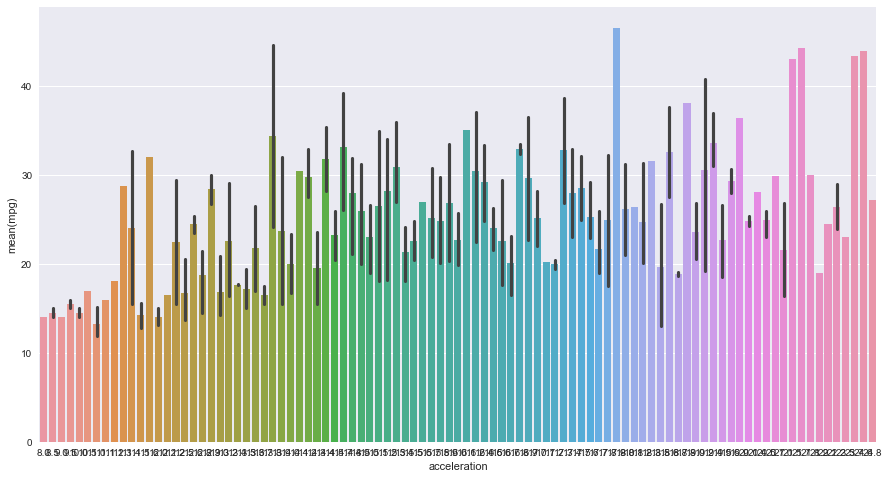

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x='acceleration', y='mpg', data=df)
plt.show()

## Relation between attributes

We think there is a strong linear relation between displacement, horsepower, weight and they are proportional to the inverse of mpg.

In [56]:
df['force']=df['acceleration']*df['weight']

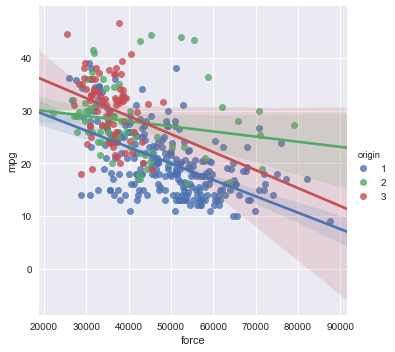

In [57]:
plt.figure(figsize=(20, 20))
sns.lmplot(x='force', y='mpg', hue='origin', data=df)
plt.show()

We think force, displacement, horsepower, and weight all all correlated

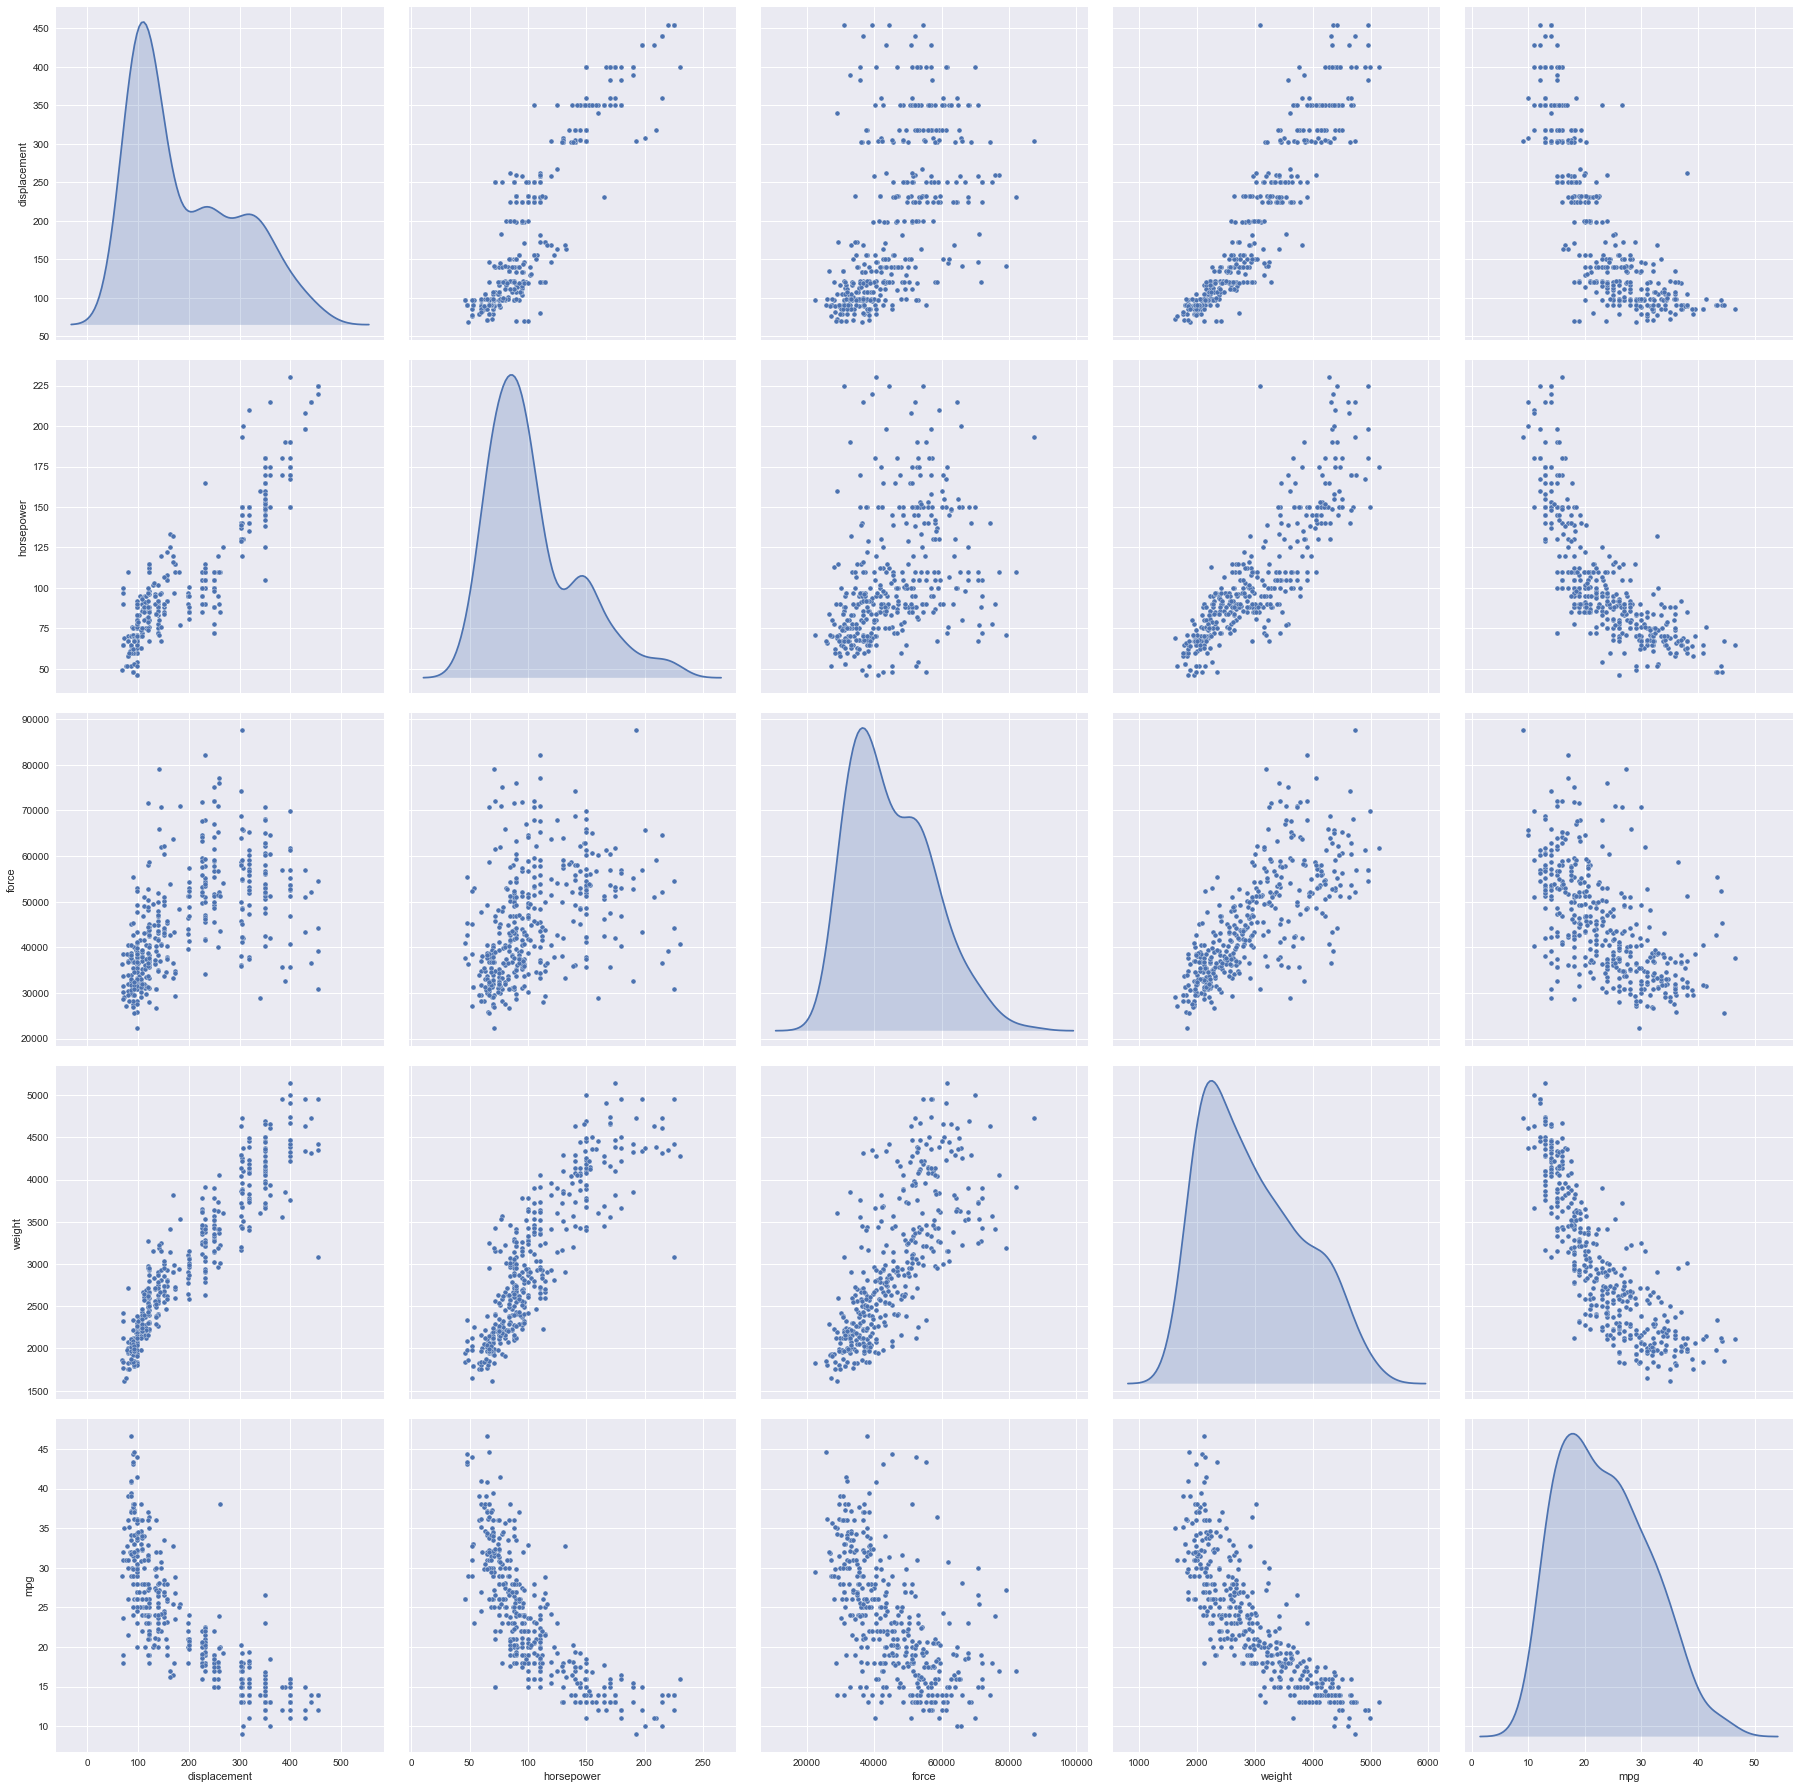

In [58]:
col =['displacement', 'horsepower', 'force', 'weight', 'mpg']
g = sns.pairplot(df[col], palette = 'seismic',size=5, diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=25))

We guess mpg is the inverse of the above attributes. Let's check that

In [59]:
df['1/mpg']=1/df['mpg']

In [60]:
df['1/mpg'].isnull().any()

False

In [61]:
df['1/mpg'].apply(np.isinf).any()

False

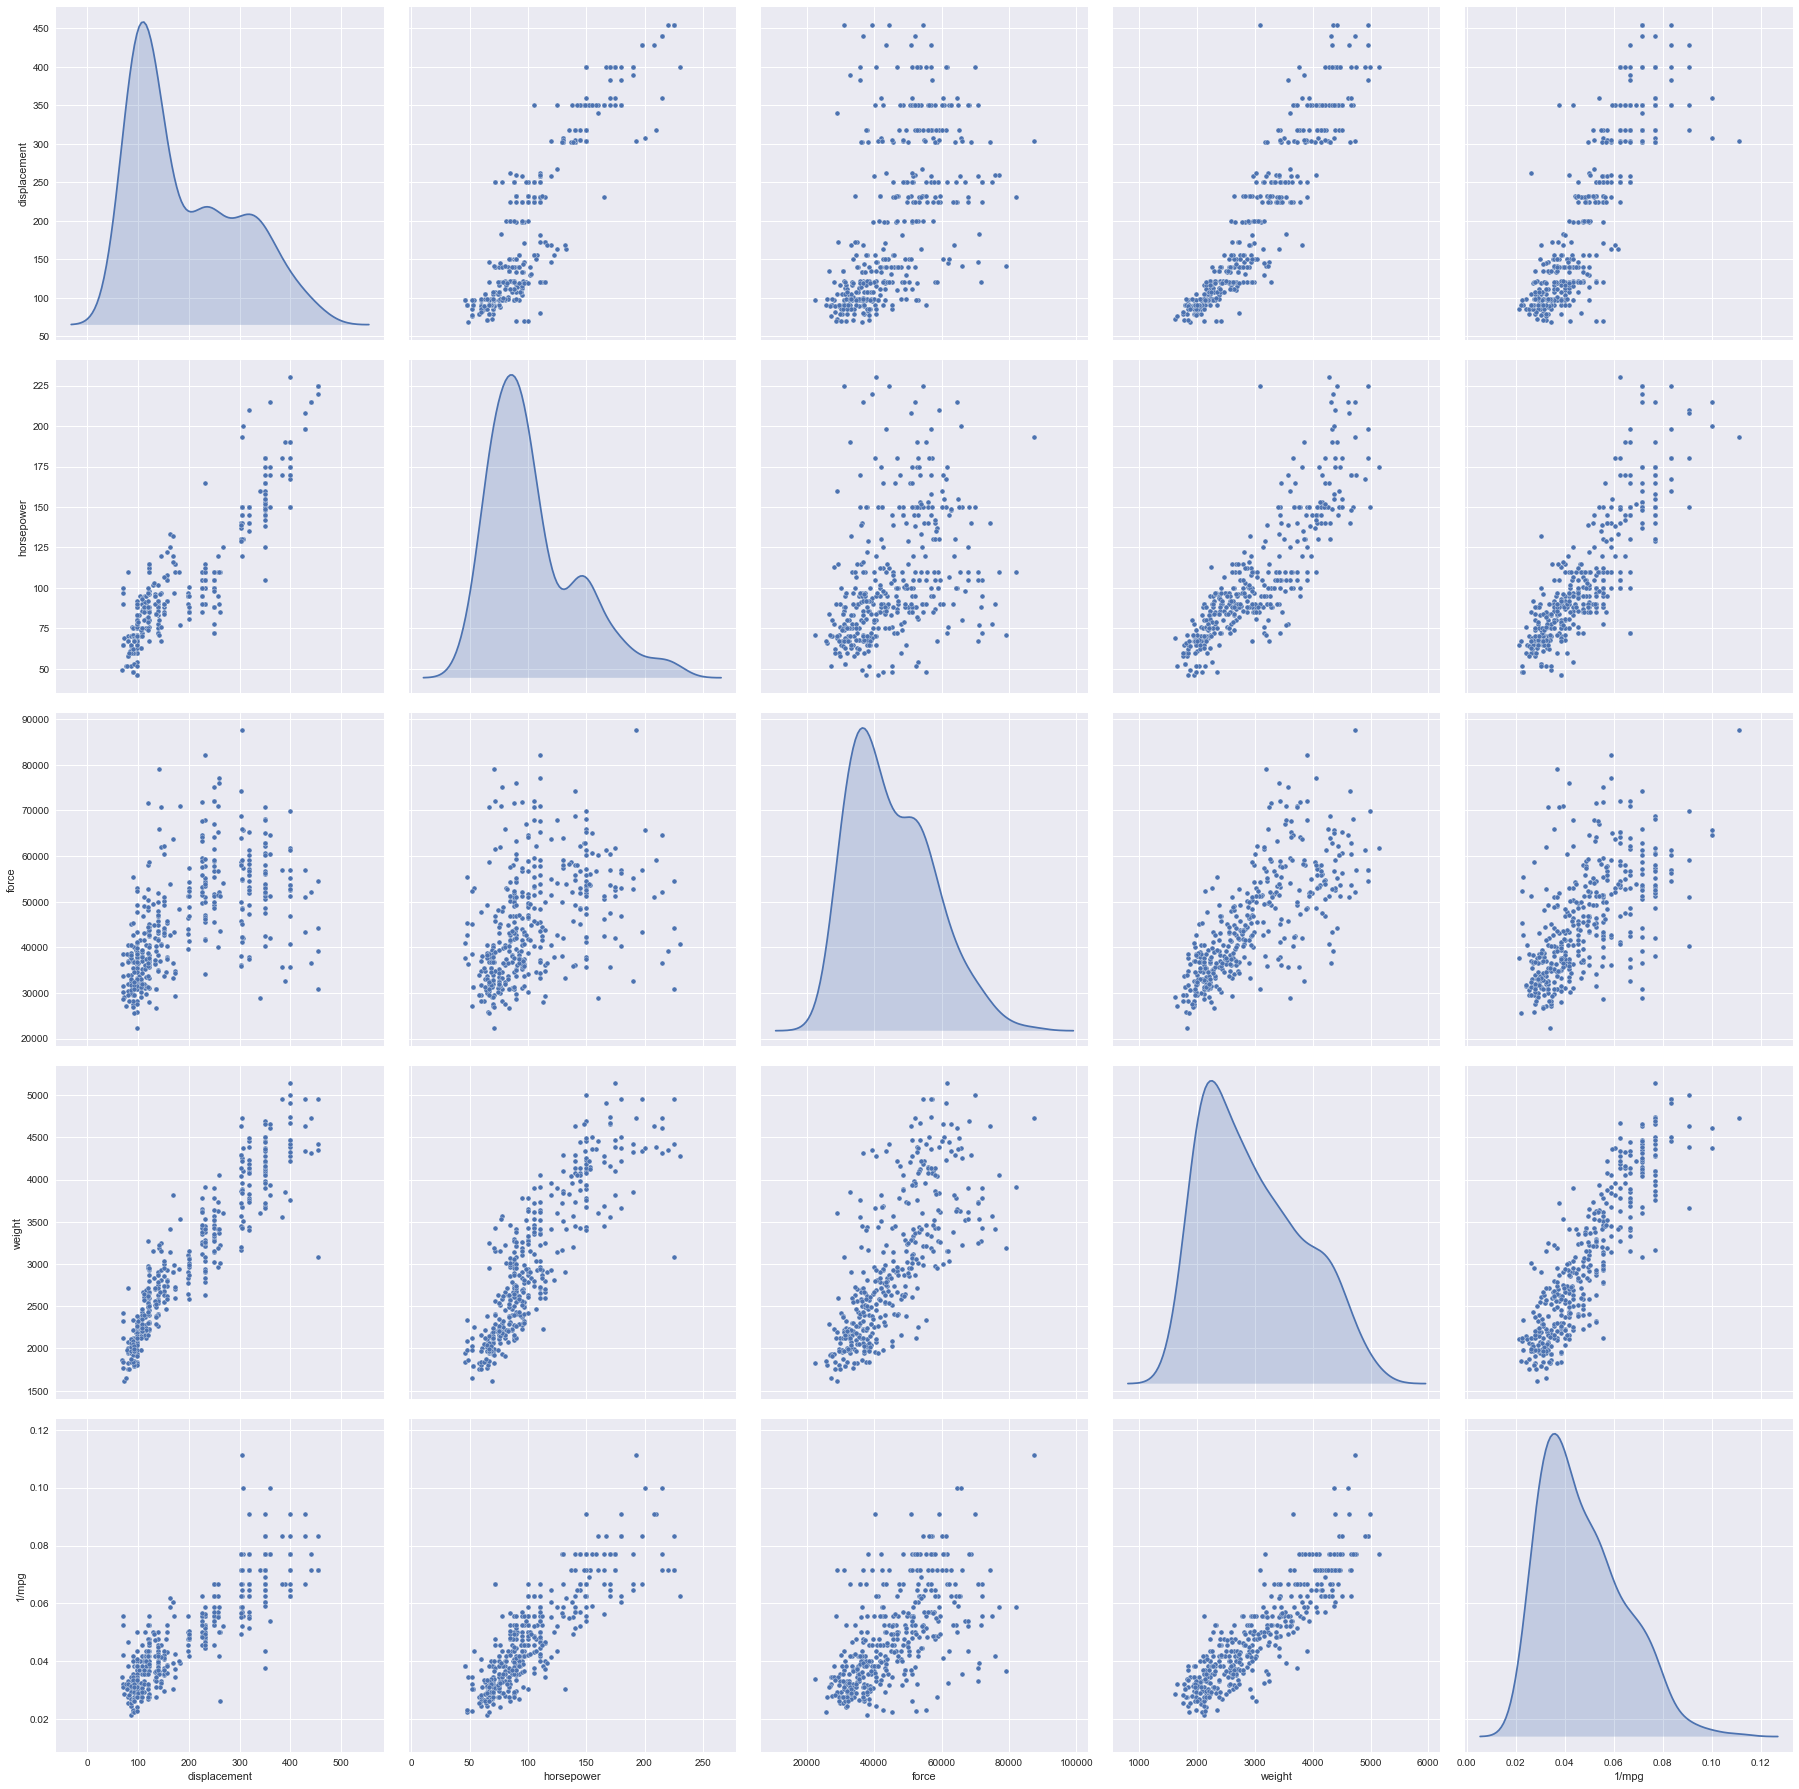

In [62]:
col =['displacement', 'horsepower', 'force', 'weight', '1/mpg']
g = sns.pairplot(df[col], palette = 'seismic',size=5, diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=25))

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in divide

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



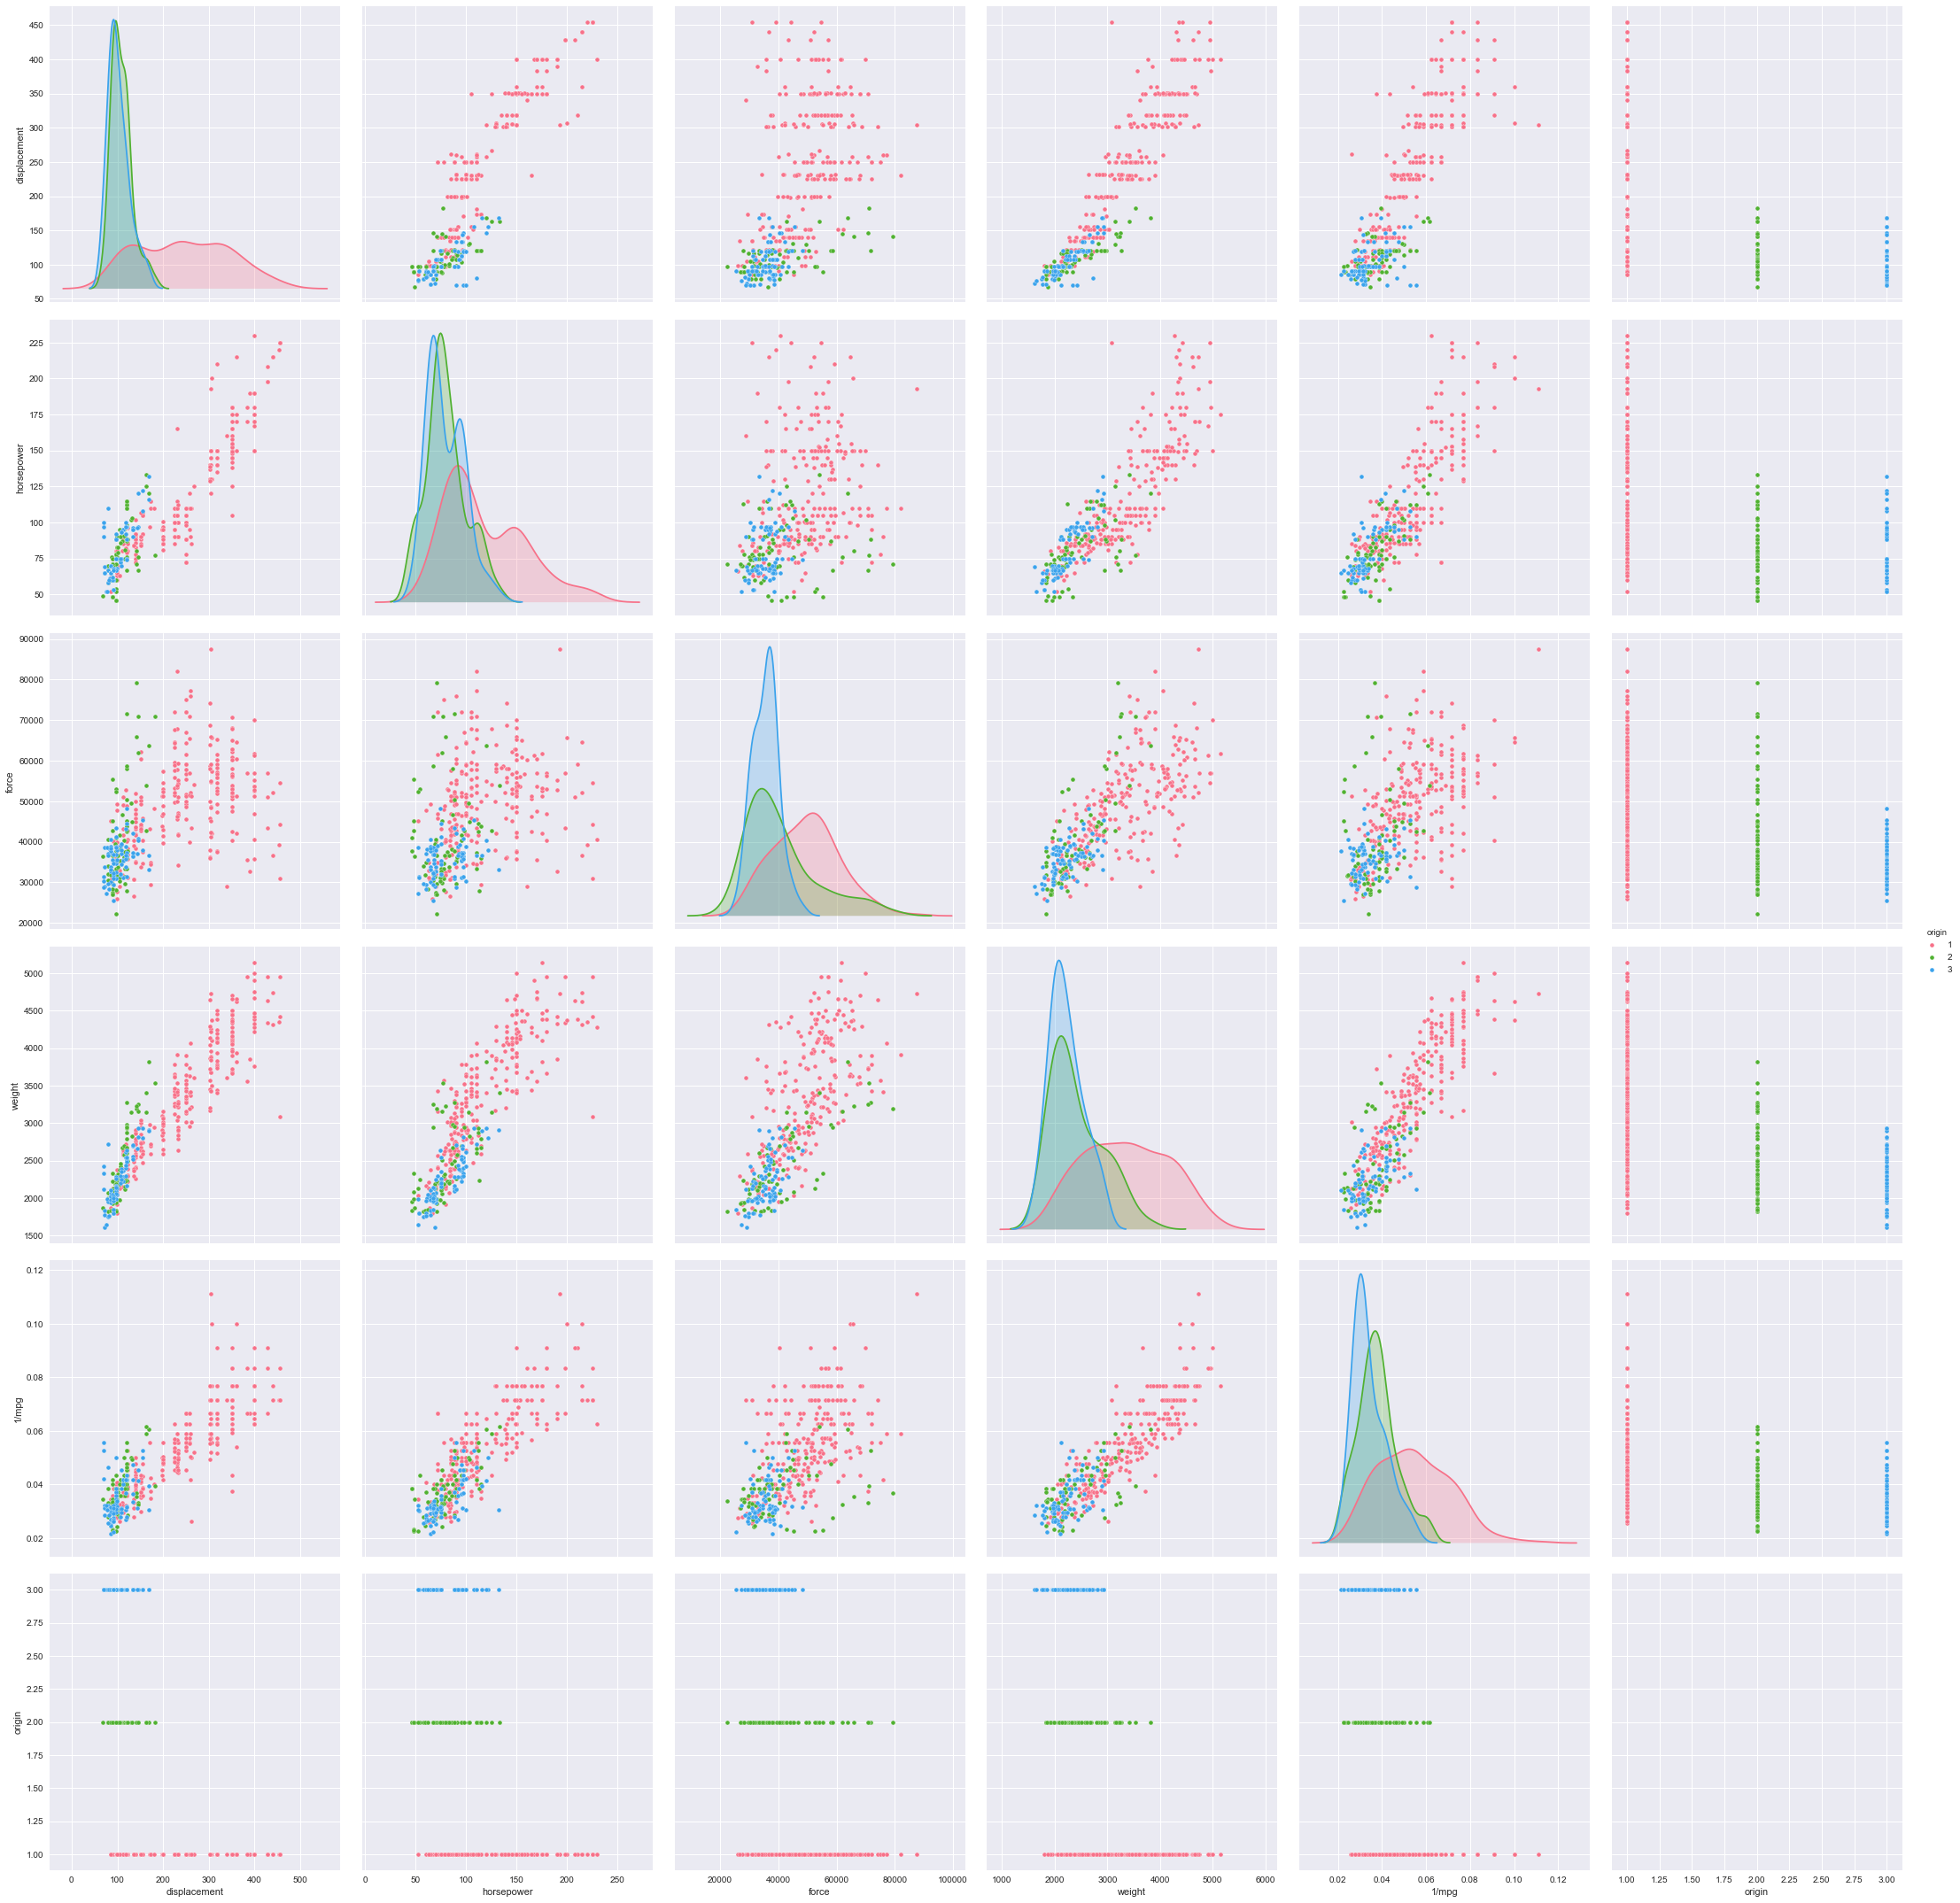

In [63]:
col =['displacement', 'horsepower', 'force', 'weight', '1/mpg', 'origin']
g = sns.pairplot(df[col], palette = 'husl',size=5, \
                 hue='origin', diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=25))

The US has the most wide range of horsepowers and displacement. Maybe it has the most varied demand.

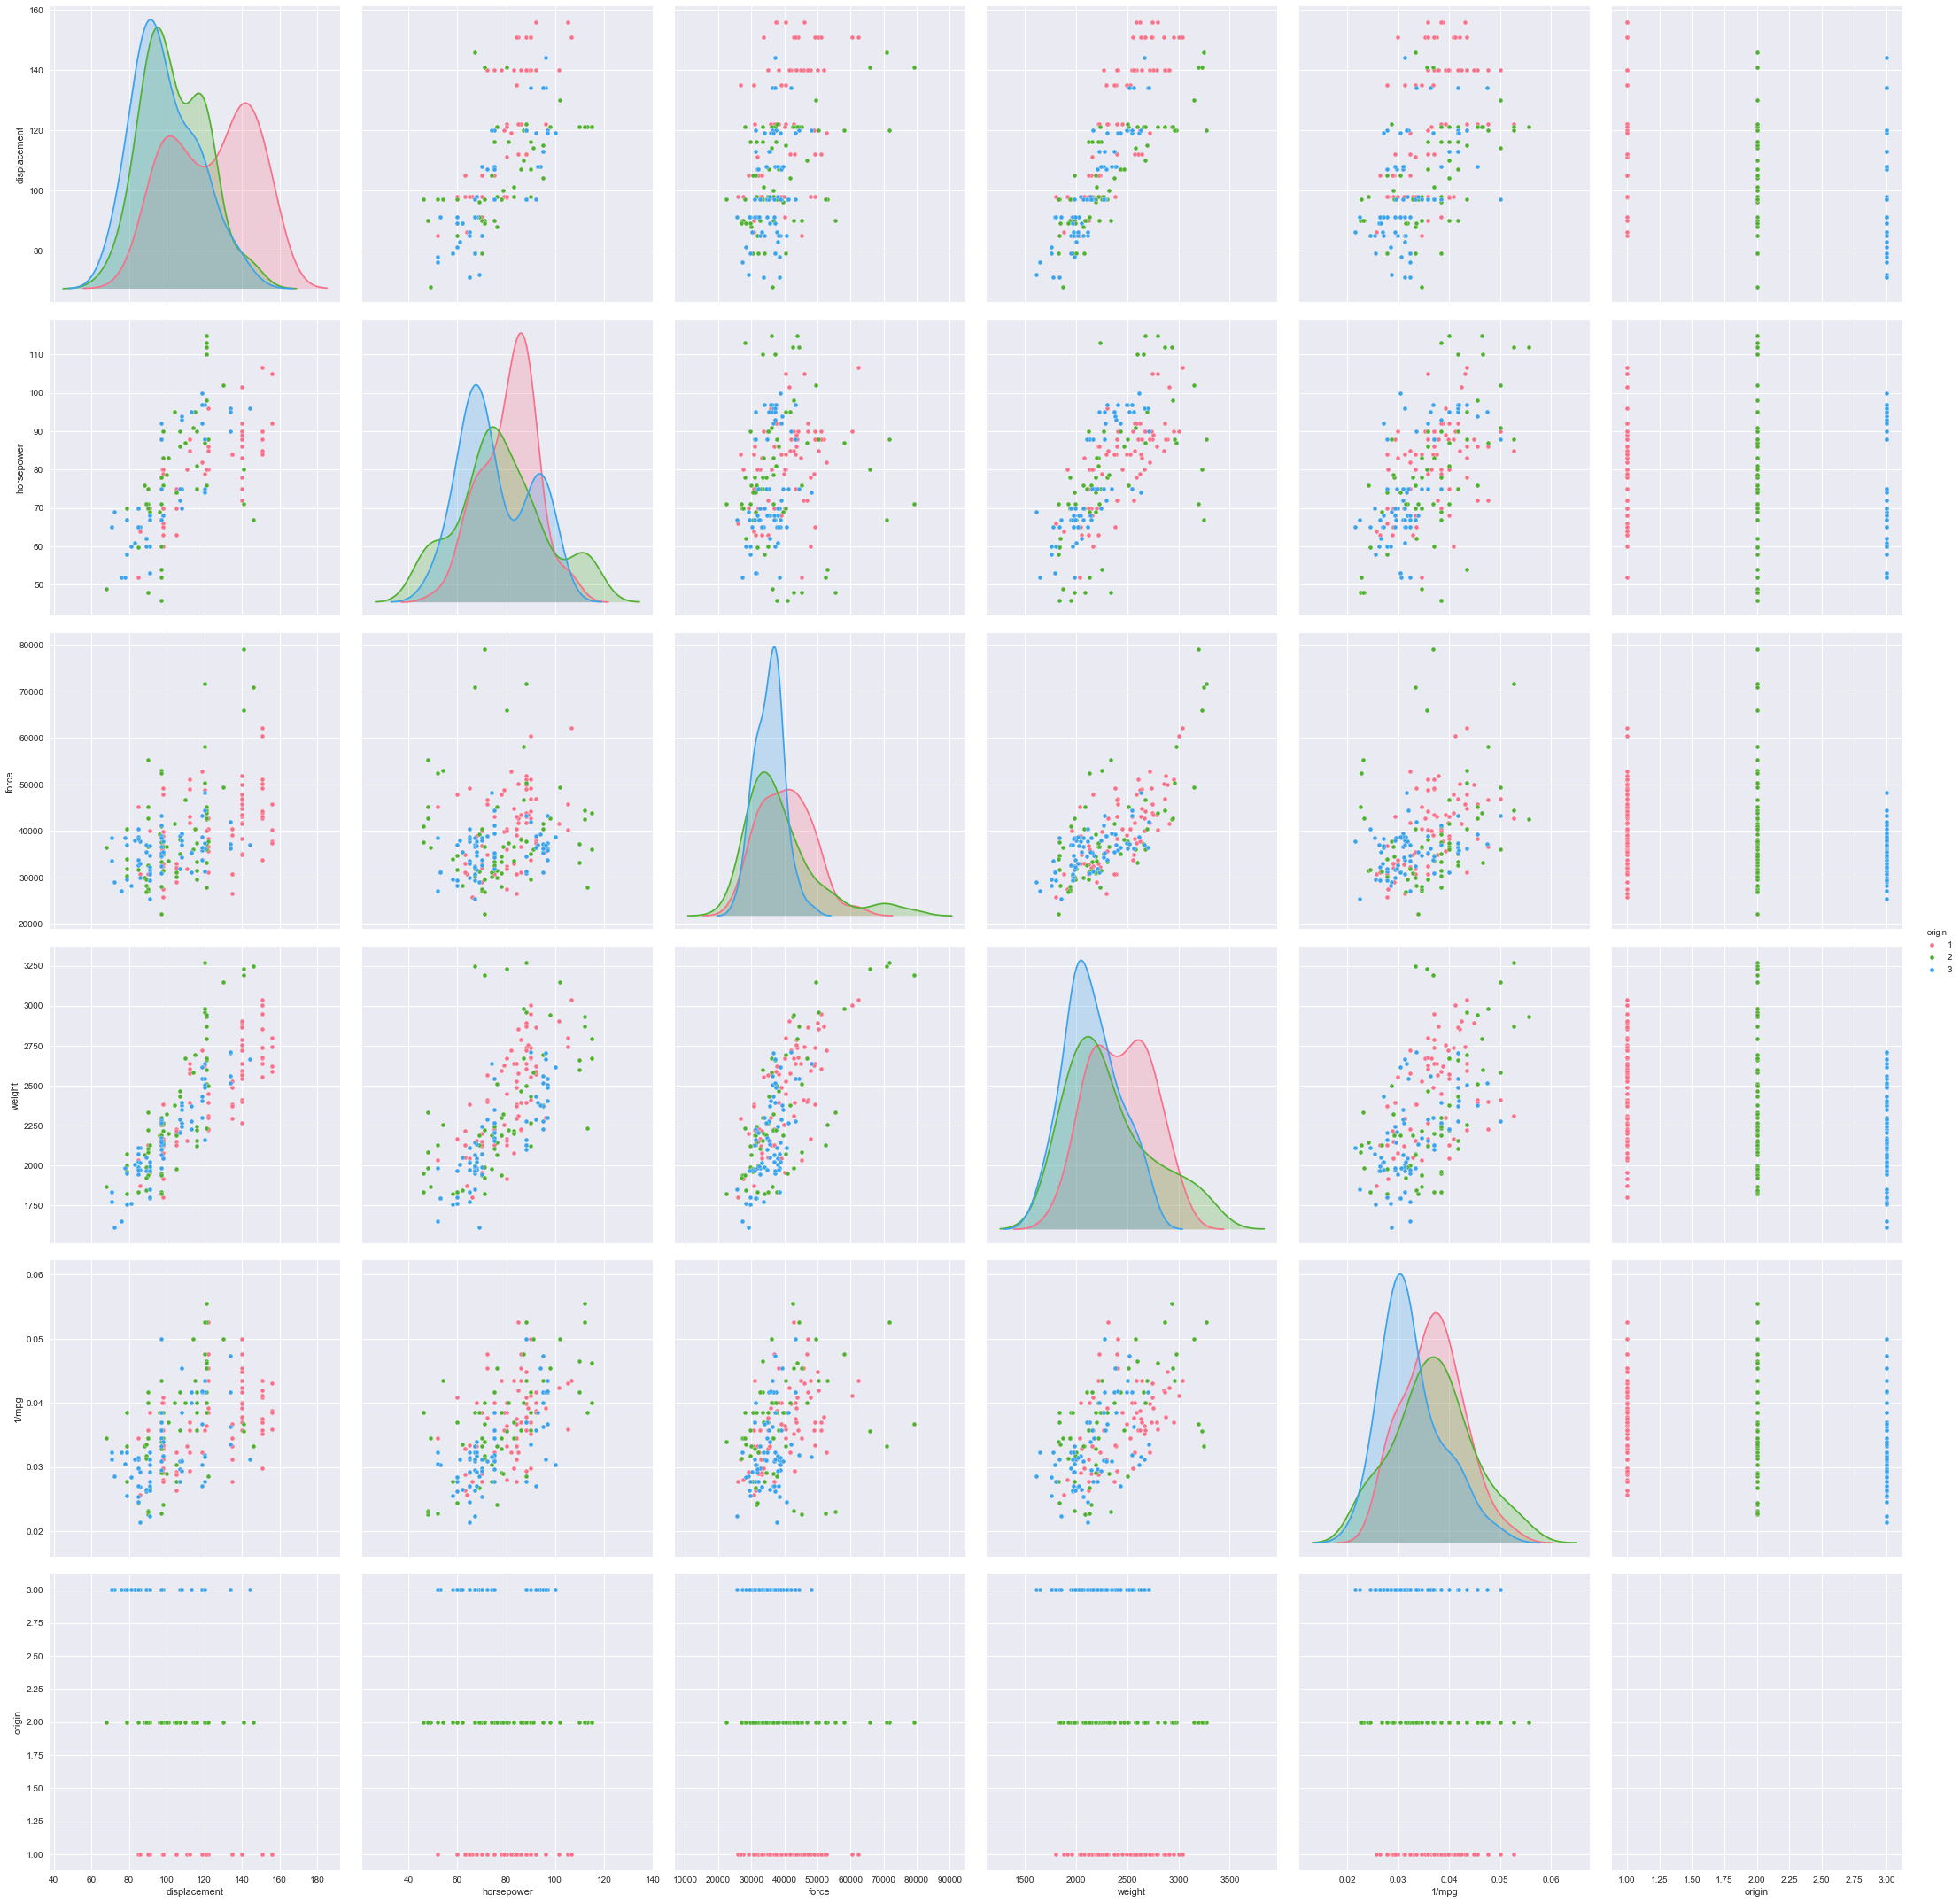

In [64]:
Four=df[df['cylinders']==4]
col =['displacement', 'horsepower', 'force', 'weight', '1/mpg', 'origin']
g = sns.pairplot(Four[col], palette = 'husl',size=5, \
                 hue='origin', diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=25))

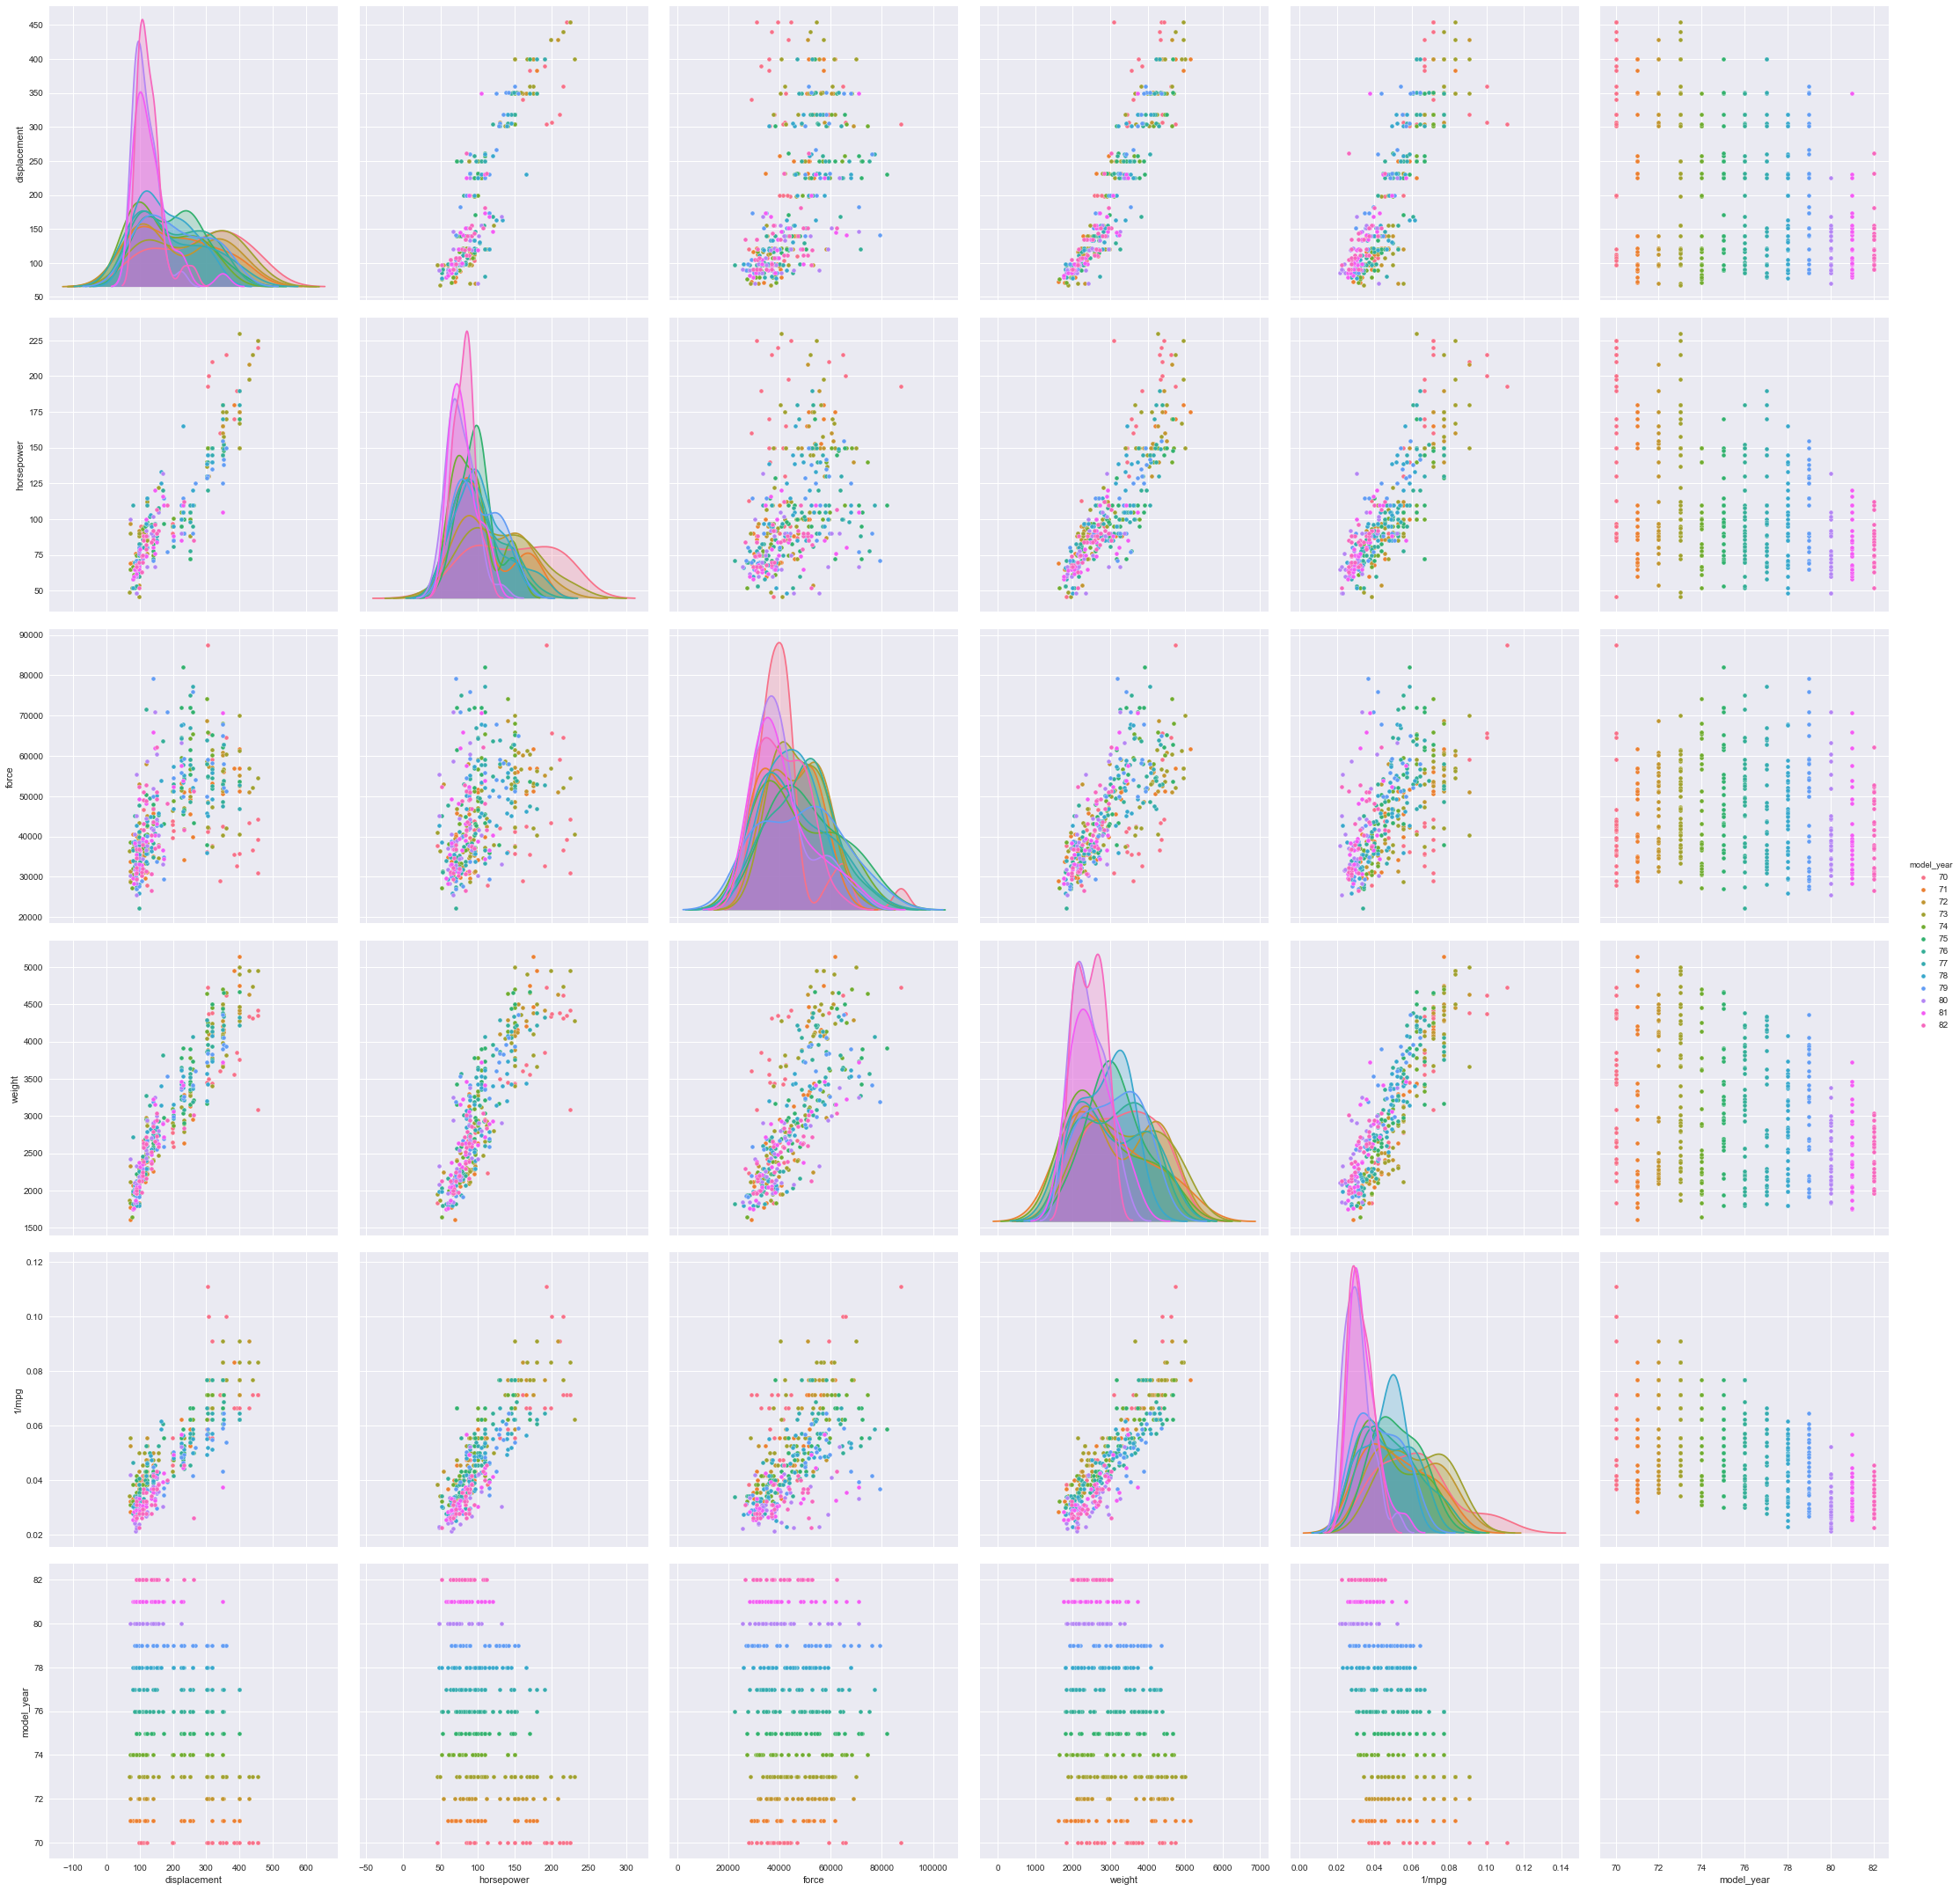

In [65]:
col =['displacement', 'horsepower', 'force', 'weight', '1/mpg', 'model_year']
g = sns.pairplot(df[col], palette = 'husl',size=5, \
                 hue='model_year', diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=25))

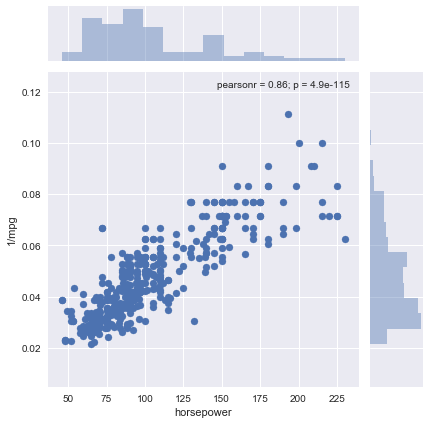

In [66]:
plt.figure(figsize=(80,60))
sns.jointplot(x='horsepower', y='1/mpg', data=df)
plt.show()

## Conclusion

We have verified the linear relation between force, displacement, horsepower, weight and the inverse of mpg in the above pairplots. In particular, I would use 1/horsepower to make a basice prediction of the MPG. The correlation is 0.86. If we subdivide the data into groups by model_year, the linear relation is better. In general, the made in US has poorer MPG compared with EU or Japan made. If you want to get further information, maybe it is better to look into different brands. However, the lack of data may make the conclusion about different brands bad.